<a href="https://colab.research.google.com/github/afiliot/nonlinear-dimensionality-reduction/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>  Project - Advanced Statistics in ML - Spring 2019 </center></h1>
 
 
 
 <h1><center>  Non Linear Dimensionality Reduction </center></h1>
 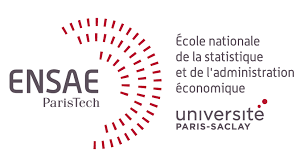
 <h3>  <p style="text-align:left;">Authors: <span style="float:right;"> Professor:<br>
     <br> Stéphan Clémençon
 </span></p>
 
 Clémentine Rosier <br> Alexandre Filiot



# Outline
 
## <a href="#Abstract" style="color:#00925B">1.&nbsp;&nbsp;Abstract</a>


## <a href="#Methods implementation" style="color:#00925B">2.&nbsp;&nbsp;Methods implementation</a>

> <a href="#Basic functions" style="color:#00925B">2.1.&nbsp;&nbsp;Basic functions</a>
>
> <a href="#Metric MultiDimensional Scaling" style="color:#00925B">2.2.&nbsp;&nbsp;Metric MultiDimensional Scaling</a>
>
> <a href="#Kernel PCA" style="color:#00925B">2.3.&nbsp;&nbsp;Kernel PCA</a>
>
> <a href="#Laplacian EigenMaps" style="color:#00925B">2.4.&nbsp;&nbsp;Laplacian EigenMaps</a>
>
> <a href="#Locally Linear Embedding" style="color:#00925B">2.5.&nbsp;&nbsp;Locally Linear Embedding</a>

## <a href="#Tests on synthetic data" style="color:#00925B">3.&nbsp;&nbsp;Tests on synthetic data</a>

> <a href="#Spheres" style="color:#00925B">3.1.&nbsp;&nbsp;Spheres</a>
>
>> <a href="#Full comparison" style="color:#00925B">3.1.1 &nbsp;&nbsp;Full comparison</a>
>>
>> <a href="#Kernel PCA: influence of sigma" style="color:#00925B">3.1.2 &nbsp;&nbsp;Kernel PCA: influence of sigma</a>
>>
> <a href="#S-curve" style="color:#00925B">3.2.&nbsp;&nbsp;S-curve</a>
>>
>> <a href="#Full comparison2" style="color:#00925B">3.2.1 &nbsp;&nbsp;Full comparison</a>
>>
>> <a href="#Kernel PCA: influence of parameters" style="color:#00925B">3.2.2 &nbsp;&nbsp;Kernel PCA: influence of parameters</a>
>>
>> <a href="#LEM: influence of k and t" style="color:#00925B">3.2.3 &nbsp;&nbsp;LEM: influence of k and t</a>
>>
>> <a href="#LLE: influence of k" style="color:#00925B">3.2.4 &nbsp;&nbsp;LLE: influence of k</a>
>
> <a href="#Swiss-roll" style="color:#00925B">3.3.&nbsp;&nbsp;Swiss-roll</a>
>
>>  <a href="#Full comparison3" style="color:#00925B">3.3.1 &nbsp;&nbsp;Full comparison</a>
>>
>> <a href="#Kernel PCA: influence of parameters2" style="color:#00925B">3.3.2 &nbsp;&nbsp;Kernel PCA: influence of parameters</a>
>>
>> <a href="#LEM: influence of k and t2" style="color:#00925B">3.3.3 &nbsp;&nbsp;LEM: influence of k and t</a>
>>
>> <a href="#LLE: influence of k2" style="color:#00925B">3.3.4 &nbsp;&nbsp;LLE: influence of k</a>

## <a href="#MNIST data set" style="color:#00925B">4.&nbsp;&nbsp;MNIST data set</a>

> <a href="#Full comparison4" style="color:#00925B">4.1 &nbsp;&nbsp;Full comparison</a>
>
> <a href="#Classification" style="color:#00925B">4.2 &nbsp;&nbsp;Classification</a>
>
>> <a href="#Linear Discriminant Analysis" style="color:#00925B">4.2.1 &nbsp;&nbsp;Linear Discriminant Analysis</a>
>>
>> <a href="#Quadratic Discriminant Analysis" style="color:#00925B">4.2.2 &nbsp;&nbsp;Quadratic Discriminant Analysis</a>
>>
>> <a href="#K-Nearest-Neighbors" style="color:#00925B">4.2.3 &nbsp;&nbsp;K-Nearest-Neighbors</a>
>>
>> <a href="#Linear SVM" style="color:#00925B">4.2.4 &nbsp;&nbsp;Linear SVM</a>
>>
>> <a href="#SVM with Gaussian kernel" style="color:#00925B">4.2.5 &nbsp;&nbsp;SVM with Gaussian kernel</a>
>>
>> <a href="#Neural Network" style="color:#00925B">4.2.6 &nbsp;&nbsp;Neural network</a>

## <a href="#Appendix" style="color:#00925B">5.&nbsp;&nbsp;Appendix</a>


<a id='Abstract'></a>

# Abstract

The following notebook provides our work as part of the evaluation of "Advanced Statistics in ML" course. Our project is dedicated to Non Linear Dimensionality Reduction (hereinafter, NLDR). Despite that each of the studied methods are fully and optimally implemented in the Scikit-Learn library, we have coded our own versions of some methods of interests: Principal Components Analysis (PCA), Kernal PCA, Metric Multidimensional Scaling (MDS), Locally Linear Embedding (LLE) and Laplacian EigenMaps (LEM). The references can be found in the report (on the master branch). 

The notebook is divided into 3 main parts: 
- Methods implementation;
- Test on synthetic data; 
- Test on the MNIST data set.

We fully provide the elements of analysis and comparison in the report. 

In [1]:
# Basic packages
import numpy as np
from numpy import random, cos, sin, sqrt, pi
import pandas as pd
from tqdm import tqdm
from time import time

# Optimisation
from numpy.linalg import multi_dot
from scipy.linalg import eig, eigh, solve
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigsh
from scipy.sparse.csgraph import connected_components

# Load and dump files
import zipfile, os, pickle

# Graphics
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from matplotlib.ticker import NullFormatter

# Sklearn functions
from sklearn.metrics import silhouette_score      # to evaluate clustering quality
import sklearn.metrics.pairwise as skp            # to compute kernels in KPCA
from sklearn.neighbors import NearestNeighbors    # to compute nearest neighbors
from sklearn import manifold, datasets            # to load Sklearn NLDR methods and benchmark datasets
from sklearn.decomposition import KernelPCA       # to speed up KernelPCA for gridsearch

# Sklearn classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC, LinearSVC

# Pytorch for DL
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Other
import inspect
from itertools import product
import warnings

<a id='Methods implementation'></a>

# Methods implementation

<a id='Basic functions'></a>

## Basic functions

In [2]:
def centering(K):
    """
    Center kernel
    :param K: np.array
    :return: np.array
    """
    n = K.shape[0]
    B = np.eye(n) - np.ones((n, n))/n
    return multi_dot([B, K, B])

def gaussian(X, sigma):
    """
    Compute Gaussian kernel with noise parameter sigma 
    :param X: np.array
    :param sigma: float
    :return: np.array
    """
    return skp.rbf_kernel(X, gamma=sigma)

def polynomial(X, d):
    """
    Compute Linear kernel with degree d: K(x,y)=(xy)^d
    :param X: np.array
    :param d: int
    :return: np.array
    """
    return skp.polynomial_kernel(X, degree=d)

def sigmoid(X, gamma):
    """
    Compute sigmoid kernel K(x,y)=(gamma*(tanh(x,y)+1))
    :param X: np.array
    :param gamma: float
    :return: np.array
    """
    return skp.sigmoid_kernel(X, gamma=gamma)

The different following functions are inspired from the classical scheme fit / transform / fit_transform which has become the norm in every ML and DL library.  `fit` aims at calibrating the model and compute the quantities of interest for applying the model on either the train set (hence `fit_transform`) or the test set (see `transform`). `X`and `y` always refer to `numpy.arrays`, this should not be changed (do not use `pandas.DataFrame` or `csr_matrix` for instance).

<a id='Metric MultiDimensional Scaling'></a>

## Metric MultiDimensional Scaling

In [3]:
class MDS():
    """
    Metric MultiDimensional Scaling
    """
    def __init__(self, p, verbose=False):
        """
        :param p: np.int, dimension of the embedded submanifold to learn
        """
        self.p = p
        self.verboseprint = print if verbose else lambda *a, **k: None
        
    def fit(self, X):
        """
        Compute the eigenvalues of X^T X and sort them in descreasing order
        """
        X_c = X-X.mean(axis=0)
        self.S = np.dot(X_c, X_c.T)
        vals, vecs = eigh(a=self.S)
        idx = vals.argsort()[::-1]
        self.eigVl = np.abs(vals[idx])
        self.eigVc = vecs[:, idx]
        
    def fit_transform(self, X, y):
        """
        Transform on train set: there is no available method for transforming on new data
        """
        self.fit(X)
        new_X = self.newData(X, y)
        new_X.iloc[:, :self.isy] = multi_dot((np.eye(self.p, X.shape[0]),
                                              np.sqrt(np.diag(self.eigVl)),
                                              self.eigVc.T)).T
        return new_X
    
    def newData(self, X, y):
        """
        Returns a pd.DataFrame with the new coordinates in the p dimensional subspace
        """
        n = X.shape[0]
        z = np.zeros(n)
        dict_ = dict(zip(['a'+str(i) for i in range(self.p)], [z]*self.p))
        if y is not None:
            dict_['Y'] = y
            self.isy = -1
        else:
            self.isy = self.p+1
        new_X = pd.DataFrame(dict_)
        return new_X

<a id='Kernel PCA'></a>

## Kernel PCA

In [4]:
class kernelPCA():
    """
    Kernel Principal Components Analysis
    """
    def __init__(self, method, params, p, verbose=False):
        """
        :param method: function, choose between polynomial, gaussian or sigmoid
        :param params: dict, for - Gaussian kernel   : {'sigma': x}
                                 - Polynomial kernel : {'d': x}
                                 - Sigmoid kernel    : {'gamma': x}
        :param p: int, dimension of the embedded submanifold to learn
        :param verbose: Bool, whether or not to display callbacks
        """
        self.method = method
        self.params = params
        self.p = p
        self.verboseprint = print if verbose else lambda *a, **k: None
        
    def fit(self, X):
        """
        Compute the normalized eigenvectors of the Gram matrix
        """
        self.X_train = X
        self.verboseprint('...Computing Gram matrix...')
        self.K = self.getK(X)
        self.verboseprint('...Computing eigenvectors...')
        eigVl, eigVc = self.getEigs(self.K)
        eigVc /= np.sqrt(eigVl)
        self.alpha = eigVc
        
    def fit_transform(self, X, y):
        """
        Transform on train set
        """
        self.fit(X)
        new_X = self.newData(X, y)
        self.verboseprint('...Projecting onto a{:3.0f}-dimensional space...'.format(self.p))
        for i in range(X.shape[0]):
            Ki = self.K[i]
            for k in range(self.p):
                new_X.iloc[i, k] = np.dot(Ki, self.alpha[:, k])
        return new_X
    
    def transform(self, X, y):
        """
        Transform on test set
        """
        new_X = self.newData(X, y)
        self.X_test = X
        self.verboseprint('...Projecting on test...')
        for i, x_test in enumerate(X[:, :-1]):
            v = []
            for j, x_train in enumerate(self.X_train[:, :-1]):
                v.append(self.phi(x_test, x_train))
            for k in range(self.p):
                new_X.iloc[i, k] = np.dot(np.array(v), self.alpha[:, k])
        return new_X
        
    def getEigs(self, K):
        """
        Eigenvalue decomposition
        :param K: np.array, kernel matrix
        :return: np.arrays, eigenvalues and corresponding eigenvectors
        """
        eigenValues, eigenVectors = eigh(K)
        idx = eigenValues.argsort()[::-1][:self.p]
        return eigenValues[idx], eigenVectors[:, idx]

    def getK(self, X):
        """
        Return the kernel matrix according to the input method
        """
        if self.method.__name__ == 'gaussian':
            sigma = self.params['sigma']
            K = centering(gaussian(X, sigma=0.5/sigma**2))
            self.phi = lambda x,y : np.exp(-0.5 * np.linalg.norm(x-y, ord=2)**2 / sigma**2)
        elif self.method.__name__ == 'polynomial':
            d = self.params['d']
            K = centering(polynomial(X, d=d))
            self.phi = lambda x,y : np.dot(x, y)**d
        elif self.method.__name__ == 'sigmoid':
            gamma = self.params['gamma']
            K = centering(sigmoid(X, gamma=gamma))
            self.phi = lambda x,y : np.tanh(gamma * np.dot(x, y))
        return K
    
    def newData(self, X, y):
        """
        Returns a pd.DataFrame with the new coordinates in the p dimensional subspace
        """
        n = X.shape[0]
        z = np.zeros(n)
        dict_ = dict(zip(['a'+str(i) for i in range(self.p)], [z]*self.p))
        if y is not None:
            dict_['Y'] = y
            self.isy = -1
        else:
            self.isy = self.p+1
        new_X = pd.DataFrame(dict_)
        return new_X

<a id='Laplacian EigenMaps'></a>

## Laplacian EigenMaps

In [5]:
class LEM():
    """
    Laplacian EigenMaps 
    """
    def __init__(self, k, p, reg, gamma, verbose=False):
        """
        :param k: int, number of nearest neighbors
        :param p: int, dimension of the embedded submanifold to learn
        :param reg: float, penalization parameter to make matrix G invertible (linear system: G * w_opt = (1,...,1), see get_weights)
        :param gamma: float, parameter t in the Belkin et al. (2003) characterizing the diffusion
        :param verbose: Bool, whether or not to display callbacks
        """
        self.k = k 
        self.p = p
        self.reg = reg
        self.gamma = gamma
        self.verboseprint = print if verbose else lambda *a, **k: None
        
    def fit(self, X):
        """
        Compute the p first eigenvectors and eigenvalues in increasing order excluding the null eigenvalue
        """
        self.X_train=X
        # For each data point, find its self.k nearest neighbors
        self.nbrs = NearestNeighbors(n_neighbors=self.k+1, algorithm='ball_tree').fit(X)
        self.neighbors = self.nbrs.kneighbors(X, n_neighbors=self.k+1, return_distance=False)[:, 1:]
        # Store the corresponding BINARY adjacency matrix
        graph = self.nbrs.kneighbors_graph(X).toarray()
        # Compute the number of connected components. /!\ If self.n_components > 1, the algorithm might not work perfectly
        self.graph = np.maximum(graph, graph.T)
        # Weight matrix W using the diffusion kernel
        W = gaussian(X, sigma=0.25/self.gamma) * self.graph
        # Matrix D
        D = np.diag([np.sum(W[i]) for i in range(W.shape[0])])
        # Laplacian L
        L = D-W
        # Generalized eigenvalue problem
        vals, vecs = eigh(a=L, b=D) 
        idx = vals.argsort()[1:self.p+1]
        self.eigVl = vals[idx]
        self.eigVc = vecs[:, idx]
        
    def get_weigths(self, X):
        """
        Compute the weights that, for each data point, optimally (and linearly) reconstructs the latter. 
        The solution w_opt is given by solving the linear system G * w_opt = (1,...,1) where G is defined 
        in the report. /!\ This is only useful for transforming new data points /!\ and is not part of the 
        original method
        """
        Weights = np.empty((X.shape[0], self.k))
        v = np.ones(self.k, dtype=X.dtype)
        for i, x in enumerate(X):
            ind = self.neighbors[i]
            Nx = X[ind]
            G = np.dot((x-Nx), (x-Nx).T)
            trace = np.trace(G)
            if trace > 0:
                R = self.reg * trace
            else:
                R = self.reg
            G += R * np.eye(self.k)
            w = solve(G, v, sym_pos=True)
            Weights[i] = w / np.sum(w)
        return Weights

    def fit_transform(self, X, y):
        """
        Transform on train set
        """
        self.fit(X)
        self.Weights = self.get_weigths(X)
        new_X = self.newData(X, y)
        self.verboseprint('Projecting onto a{:3.0f}-dimensional space'.format(self.p))
        for i in range(X.shape[0]):
            ind = self.neighbors[i]
            eigs = self.eigVc[ind]
            w = self.Weights[i]
            new_X.iloc[i, :self.isy] = np.sum((w * eigs.T[:, None]).T, axis=0)
        self.verboseprint('Done.')
        return new_X
    
    
    def transform(self, X, y):
        """
        Transform on test set: - find the self.k nearest (training) neighbors of a new data point
                               - solve the linear system to find w_opt
                               - re-use the eigenvectors weighted by w_opt
        This method is inspired from LLE (see below)
        """
        v = np.ones(self.k, dtype=X.dtype)
        new_X = self.newData(X, y)
        neighbors_test = self.nbrs.kneighbors(X, n_neighbors=self.k, return_distance=False)
        for i, x in enumerate(X):
            ind = neighbors_test[i]
            eigs = self.eigVc[ind]
            Nx = self.X_train[ind]
            G = np.dot((x-Nx), (x-Nx).T)
            trace = np.trace(G)
            # Add a penalisation to make G invertible
            if trace > 0:
                R = self.reg * trace
            else:
                R = self.reg
            G += R * np.eye(self.k)
            w = solve(G, v, sym_pos=True)
            new_X.iloc[i, :self.isy] = np.sum(((w / np.sum(w)) * eigs.T[:, None]).T, axis=0)
        return new_X
    
    def newData(self, X, y):
        """
        Return a pd.DataFrame with the new coordinates in the p dimensional subspace
        """
        n = X.shape[0]
        z = np.zeros(n)
        dict_ = dict(zip(['a'+str(i) for i in range(self.p)], [z]*self.p))
        if y is not None:
            dict_['Y'] = y
            self.isy = -1
        else:
            self.isy = self.p+1
        new_X = pd.DataFrame(dict_)
        return new_X

<a id='Locally Linear Embedding'></a>

## Locally Linear Embedding

In [6]:
class LLE():
    """
    Locally Linear Embedding
    """
    def __init__(self, k, p, reg, verbose=False):
        """
        :param k: int, number of nearest neighbors
        :param p: int, dimension of the embedded submanifold to learn
        :param reg: float, penalization parameter to make matrix G invertible (linear system: G * w_opt = (1,...,1), see get_weights)
        :param verbose: Bool, whether or not to display callbacks
        """
        self.k = k 
        self.p = p
        self.reg = reg
        self.verboseprint = print if verbose else lambda *a, **k: None
        
    def fit(self, X):
        """
        Compute the p first eigenvectors and eigenvalues in increasing order excluding the null eigenvalue
        """
        self.X_train = X
        # For each data point, find its self.k nearest neighbors
        self.nbrs = NearestNeighbors(n_neighbors=self.k+1, algorithm='ball_tree').fit(X)
        self.neighbors = self.nbrs.kneighbors(X, n_neighbors=self.k+1, return_distance=False)
        # Compute the optimal reconstruction weights
        self.W, self.Weights = self.get_weigths(X)
        n = self.W.shape[0]
        # Compute the symmetric, sparse, s.d.p matrix E (see report)
        E = np.dot((np.eye(n)-self.W).T, np.eye(n)-self.W)
        # Eigenvalue decomposition
        vals, vecs = eigh(a=E)
        idx = vals.argsort()[1:self.p+1]
        self.eigVl = vals[idx]
        self.eigVc = vecs[:, idx]
        
    def get_weigths(self, X):
        """
        Compute the weights that, for each data point, optimally (and linearly) reconstructs the latter. 
        The solution w_opt is given by solving the linear system G * w_opt = (1,...,1) where G is defined 
        in the report. /!\ Here, this is useful for fitting (resp. transforming) training (resp. testing) points /!\
        """
        W = np.zeros((X.shape[0], X.shape[0]))
        Weights = np.empty((X.shape[0], self.k))
        v = np.ones(self.k, dtype=X.dtype)
        for i, x in enumerate(X):
            ind = self.neighbors[i, 1:]
            Nx = X[ind]
            G = np.dot((x-Nx), (x-Nx).T)
            trace = np.trace(G)
            # Add a penalisation to make G invertible
            if trace > 0:
                R = self.reg * trace
            else:
                R = self.reg
            G += R * np.eye(self.k)
            w = solve(G, v, sym_pos=True)
            W[i, ind] = w / np.sum(w)
            Weights[i] = w / np.sum(w)
        return W, Weights

    def fit_transform(self, X, y):
        """
        Transform on train set
        """
        self.fit(X)
        new_X = self.newData(X, y)
        self.verboseprint('...Projecting onto a{:3.0f}-dimensional space...'.format(self.p))
        for i in range(X.shape[0]):
            ind = self.neighbors[i, 1:]
            eigs = self.eigVc[ind]
            w = self.Weights[i]
            new_X.iloc[i, :self.isy] = np.sum((w * eigs.T[:, None]).T, axis=0)
        return new_X
    
    
    def transform(self, X, y):
        """
        Transform on test set: - find the self.k nearest (training) neighbors of a new data point
                               - solve the linear system to find w_opt
                               - re-use the eigenvectors weighted by w_opt
        """
        v = np.ones(self.k, dtype=X.dtype)
        new_X = self.newData(X, y)
        neighbors_test = self.nbrs.kneighbors(X, n_neighbors=self.k, return_distance=False)
        for i, x in enumerate(X):
            ind = neighbors_test[i]
            eigs = self.eigVc[ind]
            Nx = self.X_train[ind]
            G = np.dot((x-Nx), (x-Nx).T)
            trace = np.trace(G)
            if trace > 0:
                R = self.reg * trace
            else:
                R = self.reg
            G += R * np.eye(self.k)
            w = solve(G, v, sym_pos=True)
            new_X.iloc[i, :self.isy] = np.sum(((w / np.sum(w)) * eigs.T[:, None]).T, axis=0)
        return new_X
    
    def newData(self, X, y):
        """
        Return a pd.DataFrame with the new coordinates in the p dimensional subspace
        """
        n = X.shape[0]
        z = np.zeros(n)
        dict_ = dict(zip(['a'+str(i) for i in range(self.p)], [z]*self.p))
        if y is not None:
            dict_['Y'] = y
            self.isy = -1
        else:
            self.isy = self.p+1
        new_X = pd.DataFrame(dict_)
        return new_X

<a id='Tests on synthetic data'></a>

# Tests on synthetic data

<a id='Spheres'></a>

## Spheres

First, we use a small functions to display the resulting embedding in 2 dimension.

In [7]:
def plot_results(X, title, color=None):
    """
    Plot the new data resulting from the dimension reduction
    :param X: np.array or np.DataFrame, new data
    :param title: string, plot title
    :param color: np.array, not None if the original manifold does not contain classes of points (example: S-curve, swiss-roll)
    """
    if type(X) == np.ndarray:
        X = pd.DataFrame()
    Y = X.iloc[:, -1]
    if np.unique(Y).shape[0] > 10:
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=color, cmap=plt.cm.Spectral)
        plt.title(title)
        plt.axis('tight')
    else:
        classes = Y.unique()
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X.iloc[:, 2], cmap=plt.cm.get_cmap('jet', len(classes)))
        plt.colorbar(ticks=range(len(classes)+1))
        plt.clim(np.min(classes)-0.5, np.max(classes)+0.5)
        plt.title(title)
        
def set_options(ax):
    """
    Given an axis `ax`, set some display options
    """
    ax.grid(False)
    # make the panes transparent
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # make the grid lines transparent
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

Now, we create 3 concentric spheres corresponding to 3 different classes.

In [ ]:
def disturb(x, n, sigma):
    eps = random.normal(loc=0, scale=sigma, size=n)
    return x + eps

def rand_sphere(n, r, sigma):
    z = r * (2 * random.rand(n) - 1)   # uniform in -r, r
    t = 2 * pi * random.rand(n)   # uniform in 0, 2*pi
    x = sqrt(r**2 - z**2) * cos(t)
    y = sqrt(r**2 - z**2) * sin(t)
    x = disturb(x, n, sigma); y = disturb(y, n, sigma); z = disturb(z, n, sigma)
    return x, y, z

def synthetic_noise(N, r1, r2, r3, sigma, show=True):
    """
    :param N: int, total number of points (N/3 for each class)
    :param r1, r2, r3: floats, radii of the 3 spheres
    :param sigma: float, variance of Gaussian noise in data drawing
    :show: Bool, whether or not to show the plot of the spheres
    """
    p1 = rand_sphere(int(N/3), r1, sigma)
    p2 = rand_sphere(int(N/3), r2, sigma)
    p3 = rand_sphere(int(N/3), r3, sigma)
    data1 = pd.DataFrame({'V1': p1[0], 'V2': p1[1], 'V3': p1[2], 'Y': np.ones(p1[0].shape).astype(int)})
    data2 = pd.DataFrame({'V1': p2[0], 'V2': p2[1], 'V3': p2[2], 'Y': (2*np.ones(p2[0].shape)).astype(int)})
    data3 = pd.DataFrame({'V1': p3[0], 'V2': p3[1], 'V3': p3[2], 'Y': (3*np.ones(p3[0].shape)).astype(int)})
    data = pd.concat((data1, data2, data3), axis=0)
    data = data.sample(frac=1).reset_index(drop=True)
    if show:
        x, y, z = p1
        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x, y, z, label='Class 1')
        x, y, z = p2
        ax.scatter(x, y, z, label='Class 2')
        x, y, z = p3
        ax.scatter(x, y, z, label='Class 3')
        set_options(ax)
        plt.legend(); plt.show()
    return data

data = np.array(synthetic_noise(1000, 200, 100, 50, 0, False))

<a id='Full comparison'></a>

### Full comparison

Now, let's apply the different methods. **We also provide some methods implemented in Scikit-Learn**. The following code seems infinite but accomplishes a simple redundant task: fit and transform the models on the training data, tranform on the testing data, display the results for both train and test. 

In [8]:
# Next line to silence pyflakes. This import is needed.
Axes3D

def comparison_class(train, test, n_components, params, titles, testing=False):    
    X_train, y_train = train[:, :-1], train[:, -1]
    if testing:
        X_test, y_test = test[:, :-1], test[:, -1]
    fig = plt.figure(figsize=(20, 10))
    plt.suptitle(titles[0], fontsize=14)

    print('Training...')
    method = polynomial
    KPCA1 = kernelPCA(method, {'d': 1}, n_components, verbose=False)
    t0 = time()
    Y = KPCA1.fit_transform(X_train, y_train)
    t1 = time()
    score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
    print("PCA (Own): %.2g sec | score: %.2g " % (t1 - t0, score))
    ax = fig.add_subplot(352)
    plot_results(Y, title='PCA (Own): %.2g sec' % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    t0 = time()
    MDS1 = manifold.MDS(n_components, max_iter=100, n_init=1)
    Y = MDS1.fit_transform(train)
    Y = pd.DataFrame(Y)
    Y['Y'] = y_train
    t1 = time()
    score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
    print("Nonmetric MDS (Sklearn): %.2g sec | score: %.2g " % (t1 - t0, score))
    ax = fig.add_subplot(353)
    plot_results(Y, title="Nonmetric MDS (Sklearn): %.2g sec" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    t0 = time()
    MDS2 = MDS(p=n_components)
    Y = MDS2.fit_transform(X_train, y_train)
    t1 = time()
    score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
    ax = fig.add_subplot(354)
    plot_results(Y, title="Metric MDS (Own): %.2g sec" % (t1 - t0))
    print("Metric MDS (Own): %.2g sec | score: %.2g " % (t1 - t0, score))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    method = polynomial
    d = params['kpca-poly']['d']
    KPCA2 = kernelPCA(method, {'d': d}, n_components, verbose=False)
    t0 = time()
    Y = KPCA2.fit_transform(X_train, y_train)
    t1 = time()
    score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
    print("KPCA (Poly. d=%.2g): %.2g sec | score: %.2g " % (d, t1 - t0, score))
    ax = fig.add_subplot(355)
    plot_results(Y, title="KPCA (Poly. d=%.2g): %.2g sec" % (d, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    method = gaussian
    sigma = params['kpca-gaussian']['sigma']
    KPCA3 = kernelPCA(method, {'sigma': sigma}, n_components, verbose=False)
    t0 = time()
    Y = KPCA3.fit_transform(X_train, y_train)
    t1 = time()
    score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
    print(r"KPCA (Gaussian, sigma=%.2g): %.2g sec | score: %.2g " % (sigma, t1 - t0, score))
    ax = fig.add_subplot(357)
    plot_results(Y, title=r"KPCA (Gaussian, $\sigma$=%.2g): %.2g sec" % (sigma, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    n_neighbors = params['LLE']['k']
    methods = ['standard', 'hessian']
    labels = ['LLE (Sklearn, k=%.2g)' % n_neighbors, 'Hessian LLE (Sklearn, k=%.2g)' % n_neighbors]

    for i, method in enumerate(methods):
        t0 = time()
        LLE_ = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                              eigen_solver='dense',
                                              method=method)
        if i==1:
            LLE1 = LLE_
            Y = LLE1.fit_transform(X_train)
        else:
            LLE2 = LLE_
            Y = LLE2.fit_transform(X_train)
        Y = pd.DataFrame(Y)
        Y['Y'] = y_train
        t1 = time()
        score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
        print("%s: %.2g sec | score: %.2g " % (labels[i], t1 - t0, score))
        ax = fig.add_subplot(3, 5, 8+i)
        plot_results(Y, title="%s: %.2g sec" % (labels[i], t1 - t0))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        plt.axis('tight')

    n_neighbors = params['LLE']['k']
    LLE3 = LLE(k=n_neighbors, p=n_components, reg=1e-3, verbose=False)
    t0 = time()
    Y = LLE3.fit_transform(X_train, y_train)
    t1= time()
    score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
    print("LLE (Own, k=%.2g): %.2g sec | score: %.2g " % (n_neighbors, t1 - t0, score))
    ax = fig.add_subplot(3, 5, 10)
    plot_results(Y, title="LLE (Own, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    
    n_neighbors = params['LEM']['k']
    gamma = params['LEM']['gamma']
    LEM1=LEM(k=n_neighbors, p=n_components, gamma=gamma, reg=1e-3, verbose=False)
    t0 = time()
    Y = LEM1.fit_transform(X_train, y_train)
    t1 = time()
    score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
    print("LEM (Own, k=%.2g): %.2g sec | score: %.2g " % (n_neighbors, t1 - t0, score))
    ax = fig.add_subplot(3, 5, 12)
    plot_results(Y, title="LEM (Own, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    t0 = time()
    n_neighbors = params['SDE']['k']
    LEM2 = manifold.SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors)
    Y = LEM2.fit_transform(X_train)
    Y = pd.DataFrame(Y)
    Y['Y'] = y_train
    t1 = time()
    score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
    print("SDE (Sklearn, k=%.2g): %.2g sec | score: %.2g " % (n_neighbors, t1 - t0, score))
    ax = fig.add_subplot(3, 5, 13)
    plot_results(Y, title="SDE (Sklearn, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    t0 = time()
    n_neighbors = params['ISO']['k']
    ISO = manifold.Isomap(n_neighbors, n_components)
    Y = ISO.fit_transform(X_train)
    Y = pd.DataFrame(Y)
    Y['Y'] = y_train
    t1 = time()
    score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
    print("Isomap (Sklearn, k=%.2g): %.2g sec | score: %.2g " % (n_neighbors, t1 - t0, score))
    ax = fig.add_subplot(3, 5, 14)
    plot_results(Y, title="Isomap (Sklearn, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')


    t0 = time()
    TSNE = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
    Y = TSNE.fit_transform(X_train)
    Y = pd.DataFrame(Y)
    Y['Y'] = y_train
    t1 = time()
    score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
    print("t-SNE (Sklearn): %.2g sec | score: %.2g " % (t1 - t0, score))
    ax = fig.add_subplot(3, 5, 15)
    plot_results(Y, title="t-SNE (Sklearn): %.2g sec" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    plt.show()
    
    if testing:
        fig = plt.figure(figsize=(16, 6.5))
        plt.suptitle(titles[1], fontsize=14)
        print()
        print('Testing...')
        t0 = time()
        Y = KPCA1.transform(X_test, y_test)
        t1 = time()
        score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
        print('PCA (Own): %.2g sec | score: %.2g ' % (t1 - t0, score))
        ax = fig.add_subplot(241)
        plot_results(Y, title="PCA (Own): %.2g sec" % (t1 - t0))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        plt.axis('tight')

        t0 = time()
        Y = KPCA2.transform(X_test, y_test)
        t1 = time()
        score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
        print("KPCA (Poly. d=%.2g): %.2g sec | score: %.2g " % (d, t1 - t0, score))
        ax = fig.add_subplot(242)
        plot_results(Y, title="KPCA (Poly. d=%.2g): %.2g sec" % (d, t1 - t0))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        plt.axis('tight')

        t0 = time()
        Y = KPCA3.transform(X_test, y_test)
        t1 = time()
        score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
        print(r"KPCA (Gaussian, sigma=%.2g): %.2g sec | score: %.2g" % (sigma, t1 - t0, score))
        ax = fig.add_subplot(243)
        plot_results(Y, title=r"KPCA (Gaussian, $\sigma$=%.2g): %.2g sec" % (sigma, t1 - t0))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        plt.axis('tight')

        n_neighbors = params['LLE']['k']
        methods = ['standard', 'hessian']
        labels = ['LLE (Sklearn, k=%.2g)' % n_neighbors, 'Hessian LLE (Sklearn, k=%.2g)' % n_neighbors]

        for i, method in enumerate(methods):
            t0 = time()
            if i==1:
                LLE_ = LLE1
                Y = LLE1.transform(X_test)
            else:
                LLE_ = LLE2
                Y = LLE2.transform(X_test)
            t1 = time()
            Y = pd.DataFrame(Y)
            Y['Y'] = y_test
            score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
            print("%s: %.2g sec | score: %.2g" % (labels[i], t1 - t0, score))
            ax = fig.add_subplot(2, 4, 4+i)
            plot_results(Y, title="%s: %.2g sec" % (labels[i], t1 - t0))
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_major_formatter(NullFormatter())
            plt.axis('tight')

        t0 = time()
        Y = LLE3.transform(X_test, y_test)
        t1= time()
        score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
        print("LLE (Own, k=%.2g): %.2g sec | score: %.2g" % (n_neighbors, t1 - t0, score))
        ax = fig.add_subplot(246)
        plot_results(Y, title="LLE (Own, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        plt.axis('tight')

        t0 = time()
        Y = LEM1.fit_transform(X_test, y_test)
        t1 = time()
        score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
        print("LEM (Own, k=%.2g): %.2g sec | score: %.2g" % (n_neighbors, t1 - t0, score))
        ax = fig.add_subplot(247)
        plot_results(Y, title="LEM (Own, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        plt.axis('tight')

        t0 = time()
        Y = ISO.transform(X_test)
        t1 = time()
        Y = pd.DataFrame(Y)
        Y['Y'] = y_test
        score = silhouette_score(X=Y.iloc[:, :-1], labels=y_train, metric='euclidean')
        print("Isomap (Sklearn, k=%.2g): %.2g sec | score: %.2g" % (n_neighbors, t1 - t0, score))
        ax = fig.add_subplot(248)
        plot_results(Y, title="Isomap (Sklearn, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        plt.axis('tight')

Training...
PCA (Own): 0.43 sec | score: -0.026 
Nonmetric MDS (Sklearn): 0.73 sec | score: 0.017 
Metric MDS (Own): 0.049 sec | score: -0.026 
KPCA (Poly. d=5): 0.3 sec | score: 0.12 
KPCA (Gaussian, sigma=70): 0.31 sec | score: 0.45 
LLE (Sklearn, k=10): 0.11 sec | score: 0.11 
Hessian LLE (Sklearn, k=10): 0.25 sec | score: -0.024 
LLE (Own, k=10): 0.32 sec | score: 0.11 
LEM (Own, k=10): 0.34 sec | score: 0.74 
SDE (Sklearn, k=10): 0.072 sec | score: 0.44 
Isomap (Sklearn, k=10): 0.11 sec | score: -0.023 
t-SNE (Sklearn): 3.2 sec | score: -0.019 


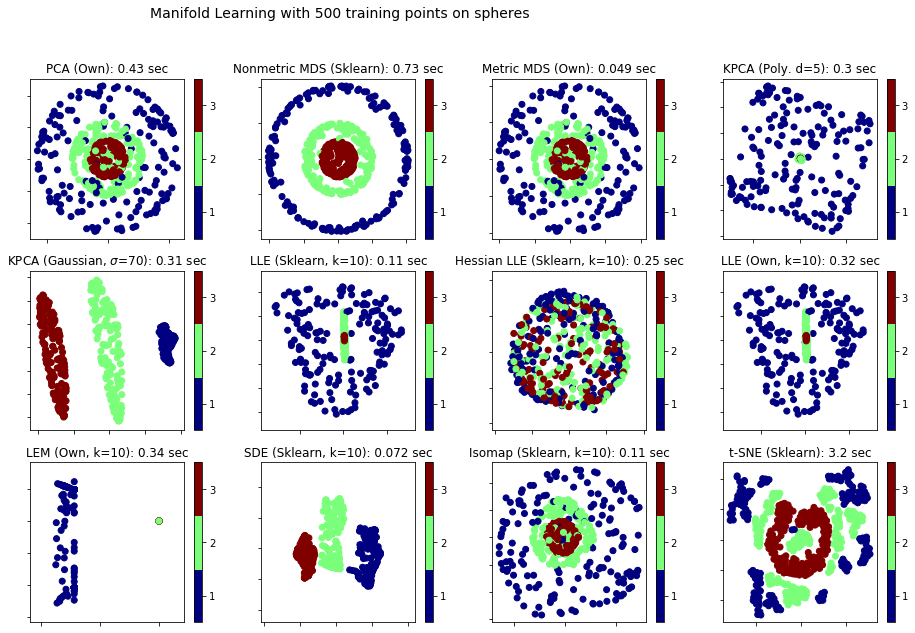


Testing...
PCA (Own): 1.6 sec | score: -0.035 
KPCA (Poly. d=5): 1 sec | score: -0.089 
KPCA (Gaussian, sigma=70): 6.1 sec | score: -0.025
LLE (Sklearn, k=10): 0.11 sec | score: -0.053
Hessian LLE (Sklearn, k=10): 0.098 sec | score: -0.016
LLE (Own, k=10): 0.29 sec | score: -0.053
LEM (Own, k=10): 0.38 sec | score: -0.066
Isomap (Sklearn, k=10): 0.045 sec | score: -0.028


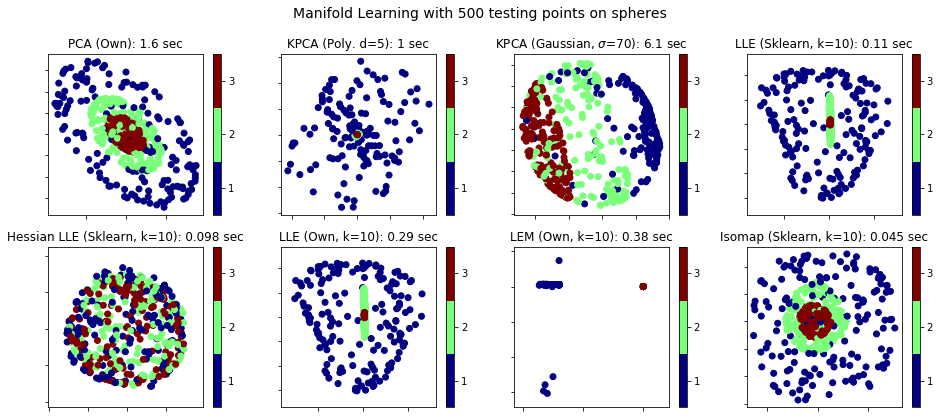

In [ ]:
N_points_train, N_points_test = 500, 500

train_set = np.array(synthetic_noise(N_points_train, 200, 100, 50, 0, False))
test_set = np.array(synthetic_noise(N_points_test, 200, 100, 50, 0, False))

titles = ["Manifold Learning with %i training points on spheres" % (N_points_train),
          "Manifold Learning with %i testing points on spheres" % (N_points_test)]

params = {'kpca-poly': {'d': 5},
          'kpca-gaussian': {'sigma': 70},
          'LLE': {'k': 10},
          'LEM': {'k': 10, 'gamma': 50},
          'ISO': {'k': 10},
          'SDE': {'k': 10}
         }

comparison_class(train_set, test_set, 2, params, titles, True)

<a id='Kernel PCA: influence of sigma'></a>

### Kernel PCA: influence of sigma

Whereas the polynomial kernel can't provide any satisfying classes separation ($\forall d$), the Gaussian kernel does. However, we notice a strong influence of the parameter $\sigma$ on the results. The optimal values of $\sigma$ belongs to an interval between 50 and 100. The tuning of $\sigma$ is part of the difficulty of fitting Kernel PCA method on the data.

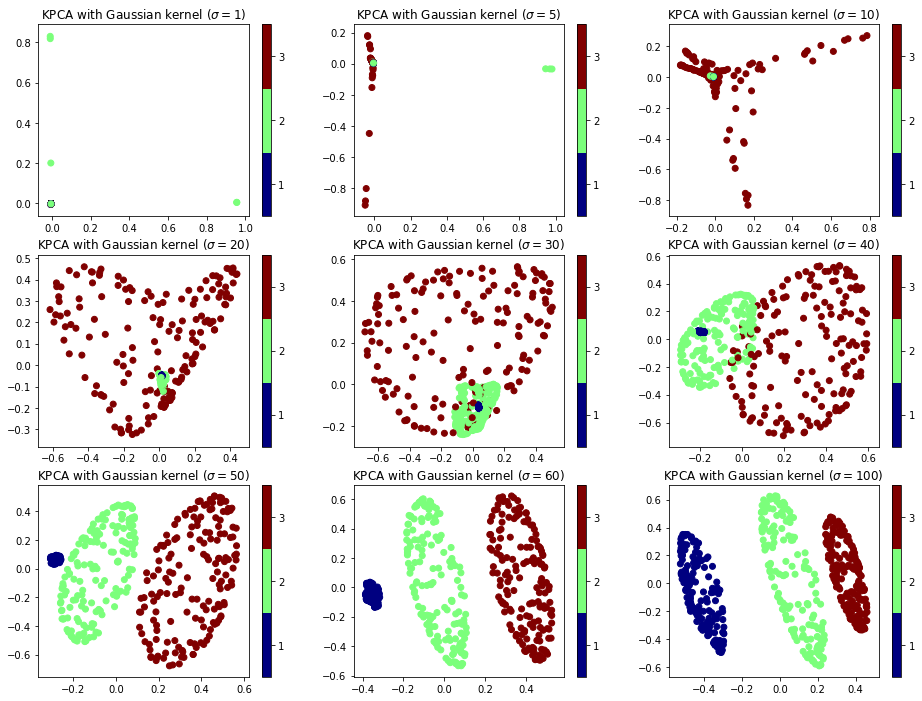

In [ ]:
plt.figure(figsize=(16, 12))
method = gaussian
for i, sigma in enumerate([1, 5, 10, 20, 30, 40, 50, 60, 100]):
    kpca = kernelPCA(method, {'sigma': sigma}, 2, verbose=False)
    train_new = kpca.fit_transform(X=train_set[:, :-1], y=train_set[:, -1])
    plt.subplot(3, 3, i+1)
    plot_results(train_new, title=r'KPCA with Gaussian kernel ($\sigma={:3.0f}$)'.format(sigma))
plt.subplots_adjust()
plt.show()

<a id='S-curve'></a>

## S-curve

<a id='Full comparison2'></a>

### Full comparison

Here again, the following piece of code is massive but performs the same task as before. 

In [9]:
# Next line to silence pyflakes. This import is needed.
Axes3D

def comparison_manifolds(data, n_components, params, title):
    X, color= data
    fig = plt.figure(figsize=(20, 10))
    plt.suptitle(title, fontsize=14)

    ax = fig.add_subplot(356, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    plt.title('Original data')
    ax.view_init(4, -72)

    method = polynomial
    kpca = kernelPCA(method, {'d': 1}, n_components, verbose=False)
    t0 = time()
    Y = kpca.fit_transform(X, None)
    t1 = time()
    print("PCA (Own): %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(352)
    plot_results(Y, title='PCA (Own): %.2g sec' % (t1 - t0), color=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    t0 = time()
    mds = manifold.MDS(n_components, max_iter=100, n_init=1)
    Y = mds.fit_transform(X)
    t1 = time()
    print("Nonmetric MDS (Sklearn): %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(353)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("Nonmetric MDS (Sklearn): %.2g sec" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    t0 = time()
    mds_ = MDS(p=n_components)
    Y = mds_.fit_transform(X, None)
    t1 = time()
    ax = fig.add_subplot(354)
    plot_results(Y, title="MDS (Own): %.2g sec" % (t1 - t0), color=color)
    print("MDS (Own): %.2g sec" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    method = polynomial
    d = params['kpca-poly']['d']
    kpca = kernelPCA(method, {'d': d}, n_components, verbose=False)
    t0 = time()
    Y = kpca.fit_transform(X, None)
    t1 = time()
    print("KPCA (Poly. d=%.2g): %.2g sec" % (d, t1 - t0))
    ax = fig.add_subplot(355)
    plot_results(Y, title="KPCA (Poly. d=%.2g): %.2g sec" % (d, t1 - t0), color=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    method = gaussian
    sigma = params['kpca-gaussian']['sigma']
    kpca = kernelPCA(method, {'sigma': 10}, n_components, verbose=False)
    t0 = time()
    Y = kpca.fit_transform(X, None)
    t1 = time()
    print(r"KPCA (Gaussian, sigma=%.2g): %.2g sec" % (sigma, t1 - t0))
    ax = fig.add_subplot(357)
    plot_results(Y, title=r"KPCA (Gaussian, $\sigma$=%.2g): %.2g sec" % (sigma, t1 - t0), color=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    n_neighbors = params['LLE']['k']
    methods = ['standard', 'hessian']
    labels = ['LLE (Sklearn, k=%.2g)' % n_neighbors, 'Hessian LLE (Sklearn, k=%.2g)' % n_neighbors]

    for i, method in enumerate(methods):
        t0 = time()
        Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                            eigen_solver='auto',
                                            method=method).fit_transform(X)
        t1 = time()
        print("%s: %.2g sec" % (labels[i], t1 - t0))

        ax = fig.add_subplot(3, 5, 8+i)
        plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
        plt.title("%s: %.2g sec" % (labels[i], t1 - t0))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        plt.axis('tight')

    n_neighbors = params['LLE']['k']
    L=LLE(k=n_neighbors, p=2, reg=1e-3, verbose=False)
    t0 = time()
    Y = L.fit_transform(X, None)
    t1= time()
    print("LLE (Own, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0))
    ax = fig.add_subplot(3, 5, 10)
    plot_results(Y, title="LLE (Own, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0), color=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    
    n_neighbors = params['LEM']['k']
    gamma = params['LEM']['gamma']
    L=LEM(k=n_neighbors, p=2, gamma=gamma, reg=1e-3, verbose=False)
    t0 = time()
    Y = L.fit_transform(X, None)
    t1 = time()
    print("LEM (Own, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0))
    ax = fig.add_subplot(3, 5, 12)
    plot_results(Y, title="LEM (Own, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0), color=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    t0 = time()
    n_neighbors = params['SDE']['k']
    se = manifold.SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors)
    Y = se.fit_transform(X)
    t1 = time()
    print("SDE (Sklearn, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0))
    ax = fig.add_subplot(3, 5, 13)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("SDE (Sklearn, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    

    t0 = time()
    n_neighbors = params['ISO']['k']
    Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
    t1 = time()
    print("Isomap (Sklearn, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0))
    ax = fig.add_subplot(3, 5, 14)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("Isomap (Sklearn, k=%.2g): %.2g sec" % (n_neighbors, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')


    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("t-SNE (Sklearn): %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(3, 5, 15)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("t-SNE (Sklearn): %.2g sec" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    plt.show()

PCA (Own): 0.72 sec
Nonmetric MDS (Sklearn): 3 sec
MDS (Own): 0.31 sec
KPCA (Poly. d=5): 0.82 sec
KPCA (Gaussian, sigma=10): 0.83 sec
LLE (Sklearn, k=10): 0.27 sec
Hessian LLE (Sklearn, k=10): 0.57 sec
LLE (Own, k=10): 0.83 sec
LEM (Own, k=10): 0.87 sec
SDE (Sklearn, k=10): 0.1 sec
Isomap (Sklearn, k=10): 0.45 sec
t-SNE (Sklearn): 9.9 sec


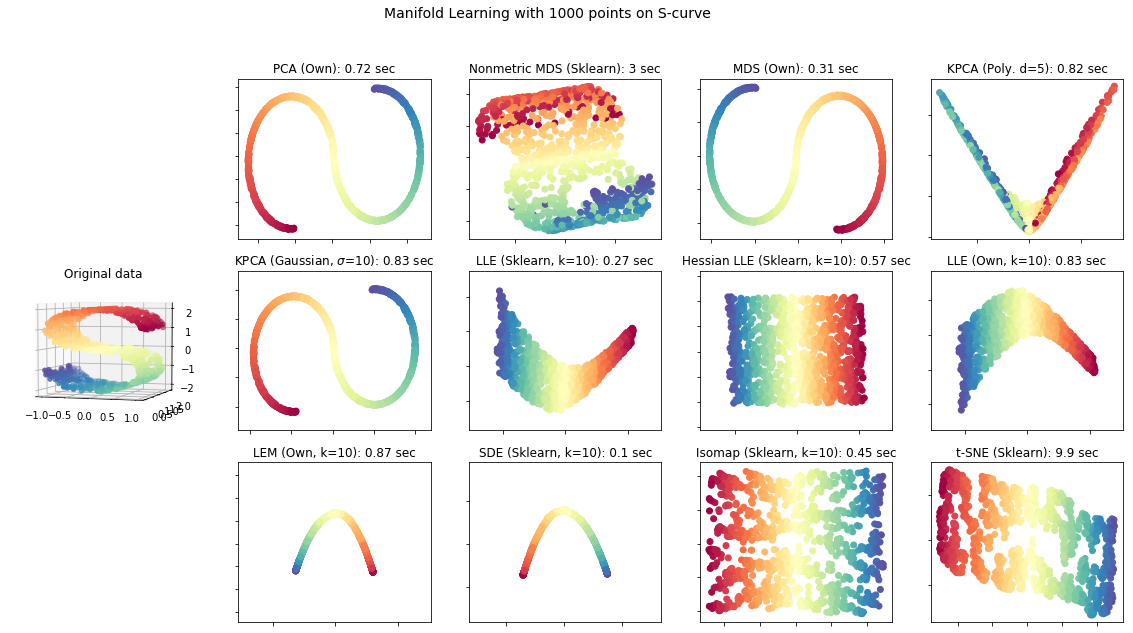

In [ ]:
n_points = 1000
data = datasets.samples_generator.make_s_curve(n_points, random_state=0)
title = "Manifold Learning with %i points on S-curve" % (n_points)
params = {'kpca-poly': {'d': 5},
          'kpca-gaussian': {'sigma': 10},
          'LLE': {'k': 10},
          'LEM': {'k': 10, 'gamma': 10},
          'ISO': {'k': 10},
          'SDE': {'k': 10}
         }

comparison_manifolds(data=data, n_components=2, params=params, title=title)

<a id='Kernel PCA: influence of parameters'></a>

### Kernel PCA: influence of parameters

Influence of $\sigma$ for the Gaussian kernel.

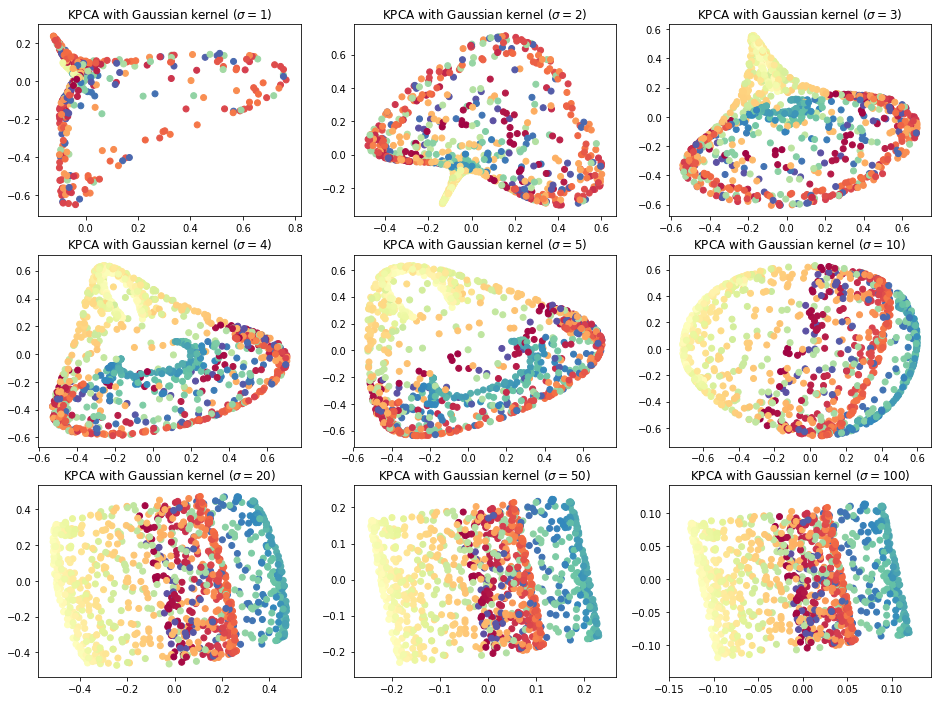

In [ ]:
data, color = datasets.samples_generator.make_swiss_roll(1000, noise=0)
plt.figure(figsize=(16, 12))
method = gaussian
for i, sigma in enumerate([1, 2, 3, 4, 5, 10, 20, 50, 100]):
    kpca = kernelPCA(method, {'sigma': sigma}, 2, verbose=False)
    train_new = kpca.fit_transform(X=data[:, :-1], y=data[:, -1])
    plt.subplot(3, 3, i+1)
    plot_results(train_new, title=r'KPCA with Gaussian kernel ($\sigma={:3.0f}$)'.format(sigma), color=color)
plt.subplots_adjust()
plt.show()

Influence of the degree $d$ for the polynomial kernel.

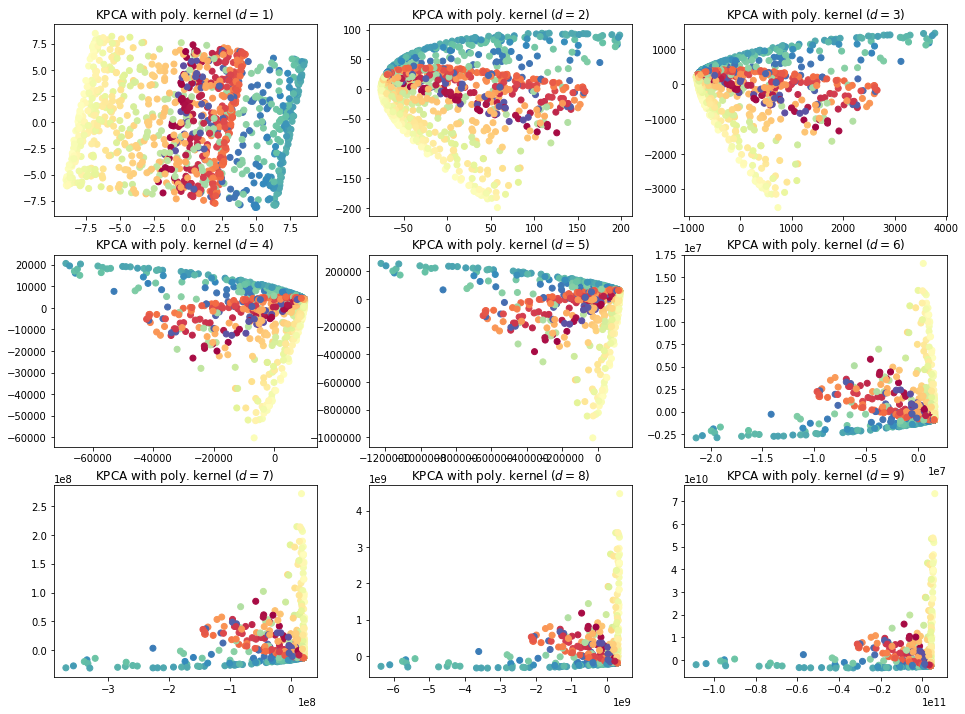

In [ ]:
plt.figure(figsize=(16, 12))
method = polynomial
for i, d in enumerate(range(1, 10)):
    kpca = kernelPCA(method, {'d': d}, 2, verbose=False)
    train_new = kpca.fit_transform(X=data[:, :-1], y=data[:, -1])
    plt.subplot(3, 3, i+1)
    plot_results(train_new, title=r'KPCA with poly. kernel ($d={:3.0f}$)'.format(d), color=color)
plt.subplots_adjust()
plt.show()

<a id='LEM: influence of k and t'></a>

### LEM: influence of k and t

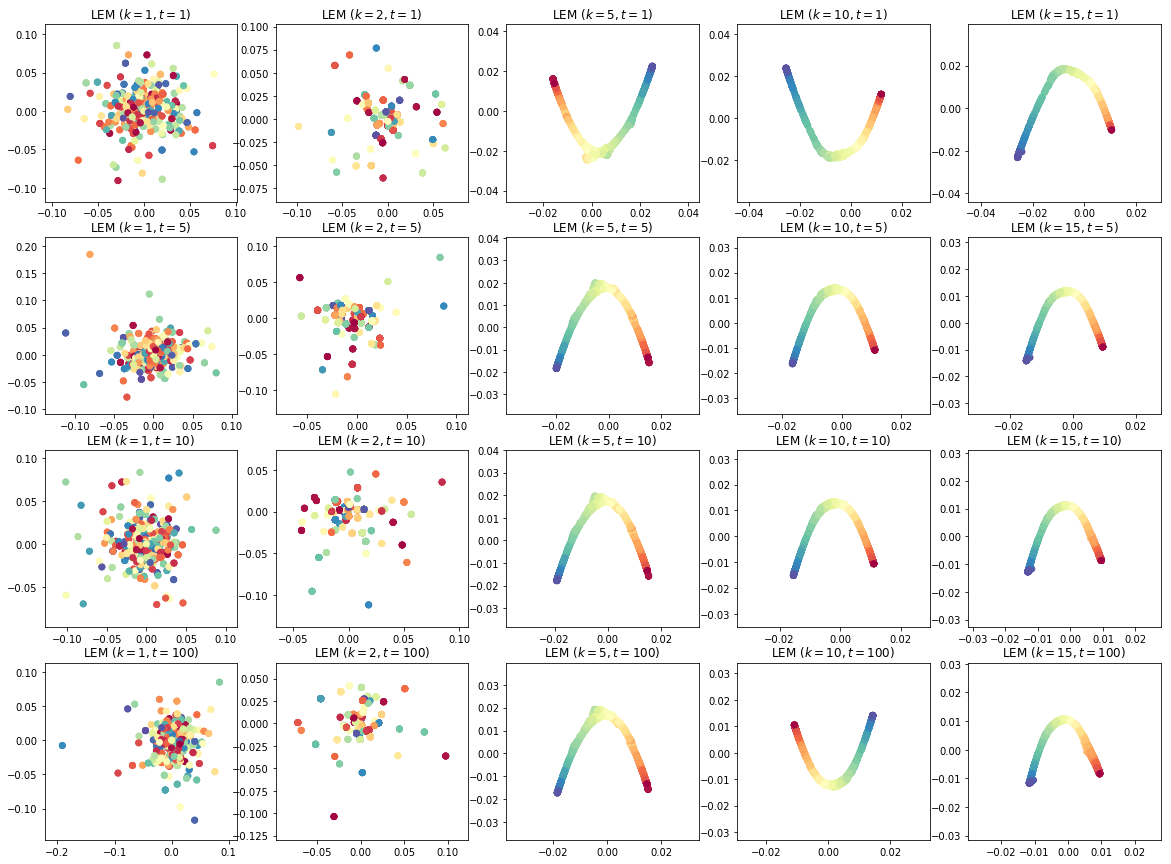

In [ ]:
plt.figure(figsize=(20, 15))
method = gaussian
for i, (k, t) in enumerate(zip([
                                    1, 2, 5, 10, 15,
                                    1, 2, 5, 10, 15,
                                    1, 2, 5, 10, 15,
                                    1, 2, 5, 10, 15
                               ],
                               [
                                     1, 1, 1, 1, 1, 
                                     5, 5, 5, 5, 5,
                                     10, 10, 10, 10, 10,
                                     100, 100, 100, 100, 100
                               ])):
    L=LEM(k=k, p=2, gamma=t, reg=1e-3, verbose=False)
    train_new = L.fit_transform(data, data[:, -1])
    plt.subplot(4, 5, i+1)
    plot_results(train_new, title='LEM ($k={:3.0f}, t={:3.0f}$)'.format(k, t), color=color)
    plt.subplots_adjust()
plt.show()

<a id='LLE: influence of k'></a>

### LLE: influence of k

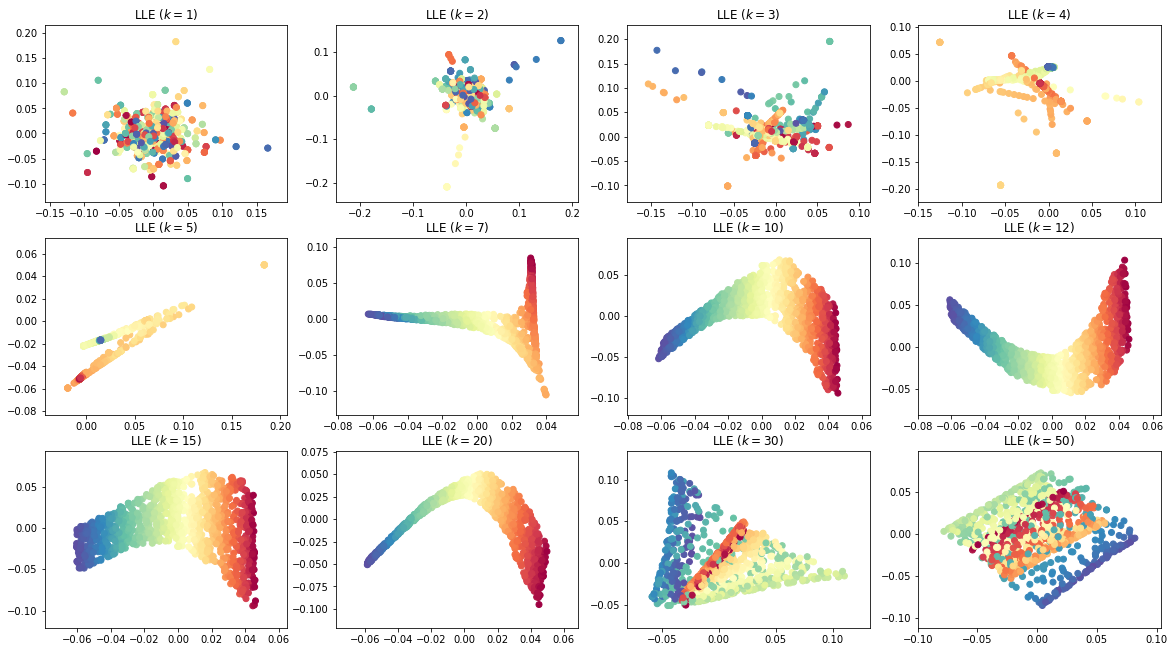

In [ ]:
plt.figure(figsize=(20, 15))
for i, k in enumerate([1, 2, 3, 4, 5, 7, 10, 12, 15, 20, 30, 50]):                 
    L=LLE(k=k, p=2, reg=1e-3, verbose=False)
    train_new = L.fit_transform(X=data, y=data[:, -1])
    plt.subplot(4, 4, i+1)
    plot_results(train_new, title='LLE ($k={:3.0f}$)'.format(k), color=color)
plt.subplots_adjust()
plt.show()

<a id='Swiss-roll'></a>

## Swiss-roll

<a id='Full comparison3'></a>

### Full comparison

Comparison with scikit learn

PCA (Own): 0.69 sec
Nonmetric MDS (Sklearn): 2.9 sec
MDS (Own): 0.2 sec
KPCA (Poly. d=5): 0.75 sec
KPCA (Gaussian, sigma=10): 0.76 sec
LLE (Sklearn, k=10): 0.23 sec
Hessian LLE (Sklearn, k=10): 0.52 sec
LLE (Own, k=10): 0.89 sec
LEM (Own, k=10): 0.87 sec
SDE (Sklearn, k=10): 0.11 sec
Isomap (Sklearn, k=10): 0.45 sec
t-SNE (Sklearn): 8 sec


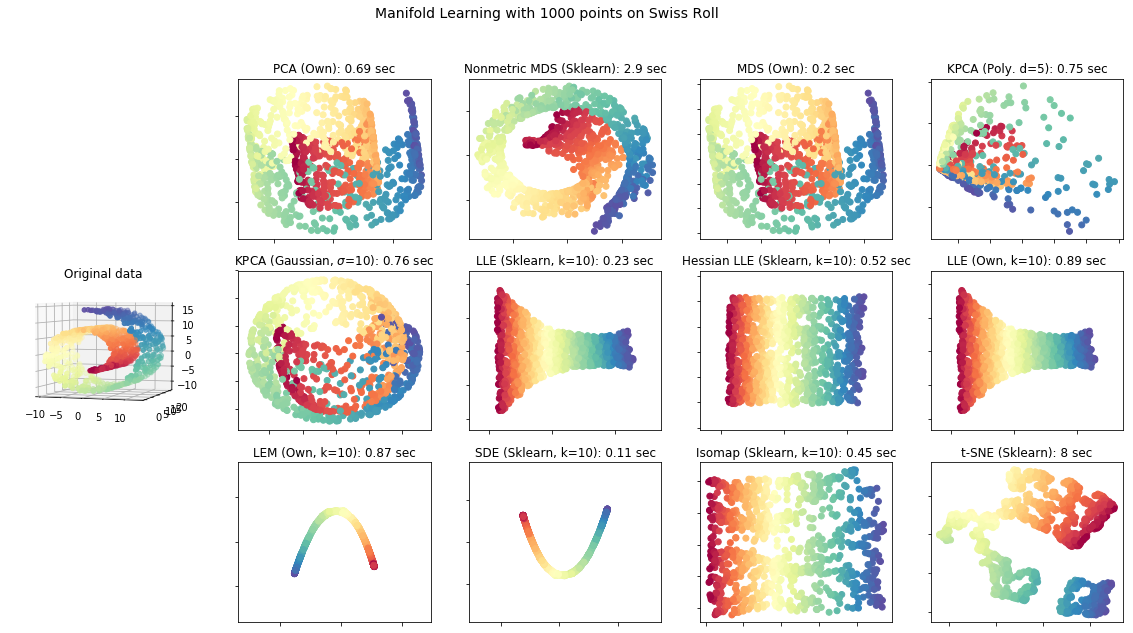

In [ ]:
n_points = 1000
data = datasets.samples_generator.make_swiss_roll(n_points, random_state=0)
title = "Manifold Learning with %i points on Swiss Roll" % (n_points)
params = {'kpca-poly': {'d': 5},
          'kpca-gaussian': {'sigma': 10},
          'LLE': {'k': 10},
          'LEM': {'k': 10, 'gamma': 10},
          'ISO': {'k': 10},
          'SDE': {'k': 10}
         }
comparison_manifolds(data=data, n_components=2, params=params, title=title)

<a id='Kernel PCA: influence of parameters2'></a>

### Kernel PCA: influence of parameters

Influence of $\sigma$ for the Gaussian kernel.

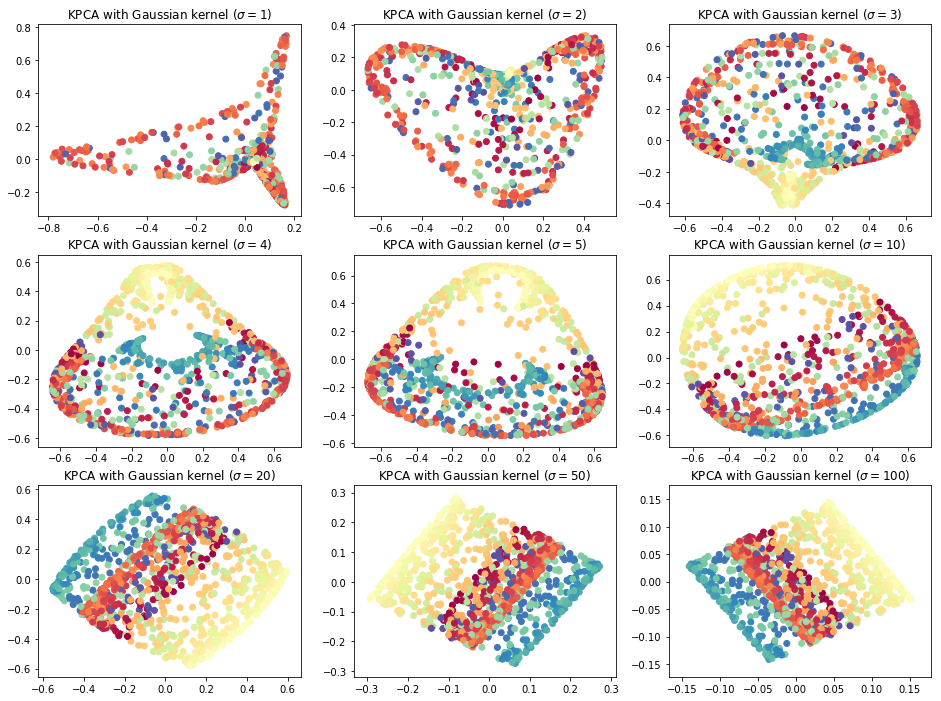

In [ ]:
data, color = datasets.samples_generator.make_swiss_roll(n_points, random_state=0)
plt.figure(figsize=(16, 12))
method = gaussian
for i, sigma in enumerate([1, 2, 3, 4, 5, 10, 20, 50, 100]):
    kpca = kernelPCA(method, {'sigma': sigma}, 2, verbose=False)
    train_new = kpca.fit_transform(X=data[:, :-1], y=data[:, -1])
    plt.subplot(3, 3, i+1)
    plot_results(train_new, title=r'KPCA with Gaussian kernel ($\sigma={:3.0f}$)'.format(sigma), color=color)
plt.subplots_adjust()
plt.show()

Influence of the degree $d$ for the polynomial kernel.

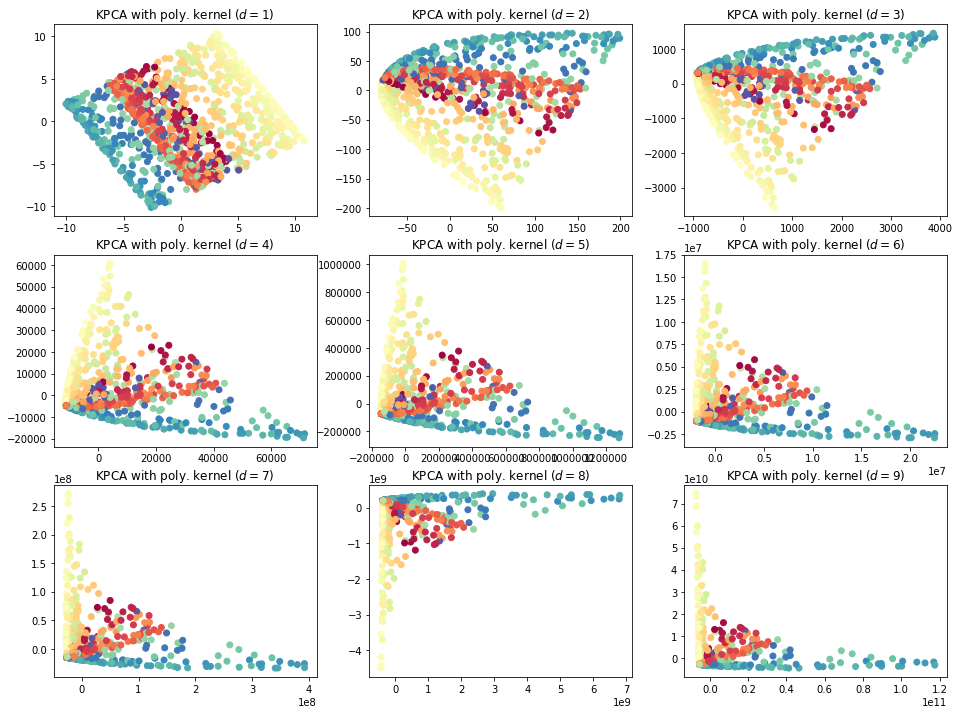

In [ ]:
plt.figure(figsize=(16, 12))
method = polynomial
for i, d in enumerate(range(1, 10)):
    kpca = kernelPCA(method, {'d': d}, 2, verbose=False)
    train_new = kpca.fit_transform(X=data[:, :-1], y=data[:, -1])
    plt.subplot(3, 3, i+1)
    plot_results(train_new, title=r'KPCA with poly. kernel ($d={:3.0f}$)'.format(d), color=color)
plt.subplots_adjust()
plt.show()

<a id='LEM: influence of k and t2'></a>

### LEM: influence of k and t

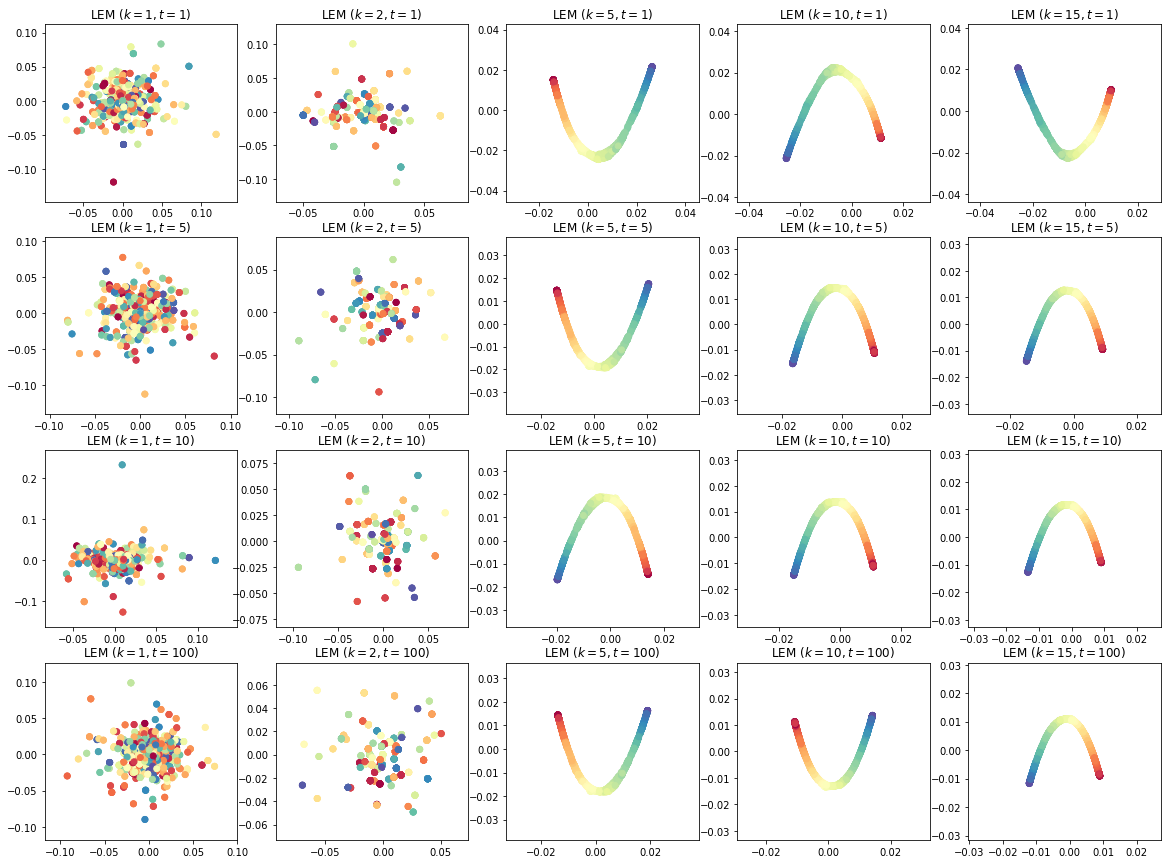

In [ ]:
plt.figure(figsize=(20, 15))
method = gaussian
for i, (k, t) in enumerate(zip([
                                    1, 2, 5, 10, 15,
                                    1, 2, 5, 10, 15,
                                    1, 2, 5, 10, 15,
                                    1, 2, 5, 10, 15
                               ],
                               [
                                     1, 1, 1, 1, 1, 
                                     5, 5, 5, 5, 5,
                                     10, 10, 10, 10, 10,
                                     100, 100, 100, 100, 100
                               ])):
    L=LEM(k=k, p=2, gamma=t, reg=1e-3, verbose=False)
    train_new = L.fit_transform(data, data[:, -1])
    plt.subplot(4, 5, i+1)
    plot_results(train_new, title='LEM ($k={:3.0f}, t={:3.0f}$)'.format(k, t), color=color)
    plt.subplots_adjust()
plt.show()

<a id='LLE: influence of k2'></a>

### LLE: influence of k

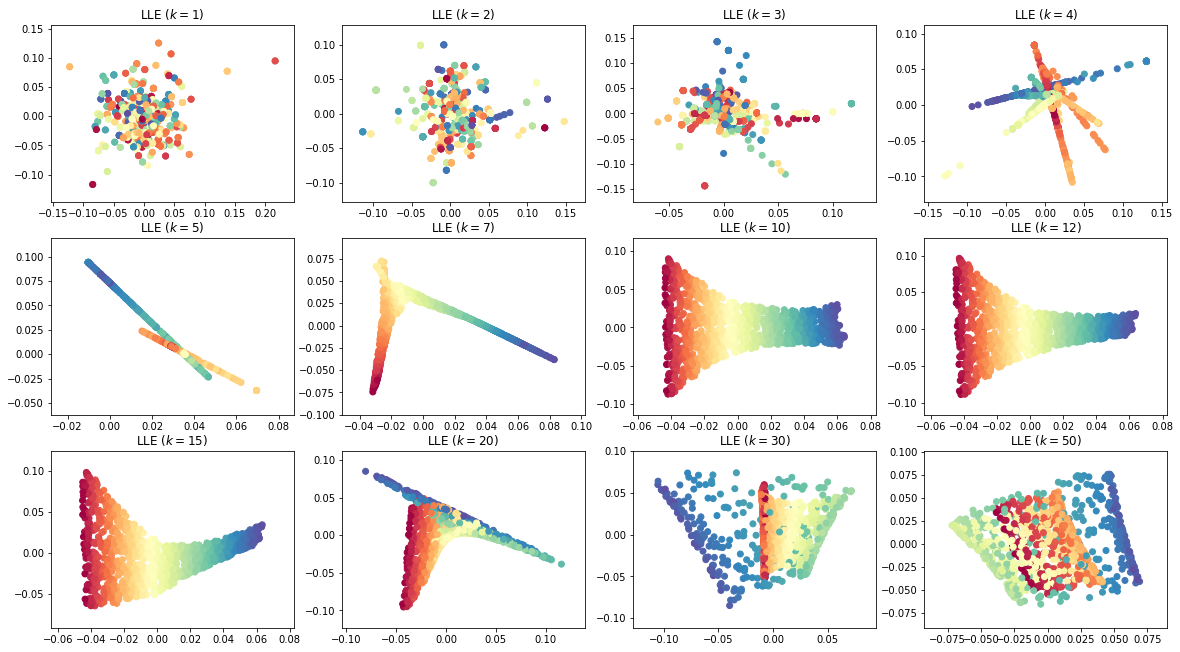

In [ ]:
plt.figure(figsize=(20, 15))
for i, k in enumerate([1, 2, 3, 4, 5, 7, 10, 12, 15, 20, 30, 50]):                 
    L=LLE(k=k, p=2, reg=1e-3, verbose=False)
    train_new = L.fit_transform(X=data, y=data[:, -1])
    plt.subplot(4, 4, i+1)
    plot_results(train_new, title='LLE ($k={:3.0f}$)'.format(k), color=color)
plt.subplots_adjust()
plt.show()

<a id='MNIST data set'></a>

# MNIST data set

Now that we've made some experiments on the benchmarks manifolds, let's confront our algorithms to a real data set: MNIST.

First, let's load it. After cloning the repo, specify your path...

In [13]:
path = '/Users/bfiliot/Desktop/ENSAE/3A/STATS_AV/nonlinear-dimensionality-reduction/'

... and execute the following cell.

In [14]:
def format(X):
    d = pd.DataFrame(X[0])
    d.columns = ['V'+str(i+1) for i in range(d.shape[1])]
    d['Y'] = X[1]
    return d

def load_data(path):
    zip_ref = zipfile.ZipFile(os.path.join(path, 'Data/mnist.pkl.gz'), 'r')
    zip_ref.extractall(os.path.join(path, 'Data'))
    zip_ref.close()
    train, valid, test = pickle.load(open(os.path.join(path, 'Data/mnist.pkl'), 'rb'), encoding='latin1')
    train, valid, test = format(train), format(valid), format(test) 
    print('Done.')
    return train, valid, test

train, val, test = load_data(path)

Done.


Let's vizualize some digits.

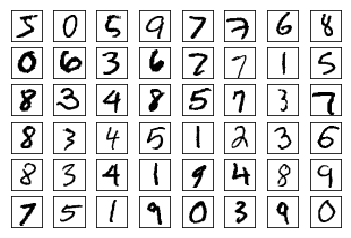

In [ ]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(np.array(train.iloc[1000 * i, :-1]).reshape(28, 28), cmap='gray_r')

<a id='Full comparison4'></a>

## Full comparison

Training...
PCA (Own): 3.7e+02 sec | score: 0.026 
Nonmetric MDS (Sklearn): 6.7e+02 sec | score: 0.037 
Metric MDS (Own): 2.3e+02 sec | score: 0.026 
KPCA (Poly. d=5): 3.7e+02 sec | score: 0.021 
KPCA (Gaussian, sigma=50): 3.7e+02 sec | score: 0.026 
LLE (Sklearn, k=30): 2.6e+02 sec | score: -0.15 
Hessian LLE (Sklearn, k=30): 2.6e+02 sec | score: -0.5 
LLE (Own, k=30): 3.6e+02 sec | score: -0.15 
LEM (Own, k=30): 6e+02 sec | score: 0.17 
SDE (Sklearn, k=30): 1.6e+02 sec | score: 0.18 
Isomap (Sklearn, k=30): 2.4e+02 sec | score: 0.0019 
t-SNE (Sklearn): 2.4e+02 sec | score: 0.35 


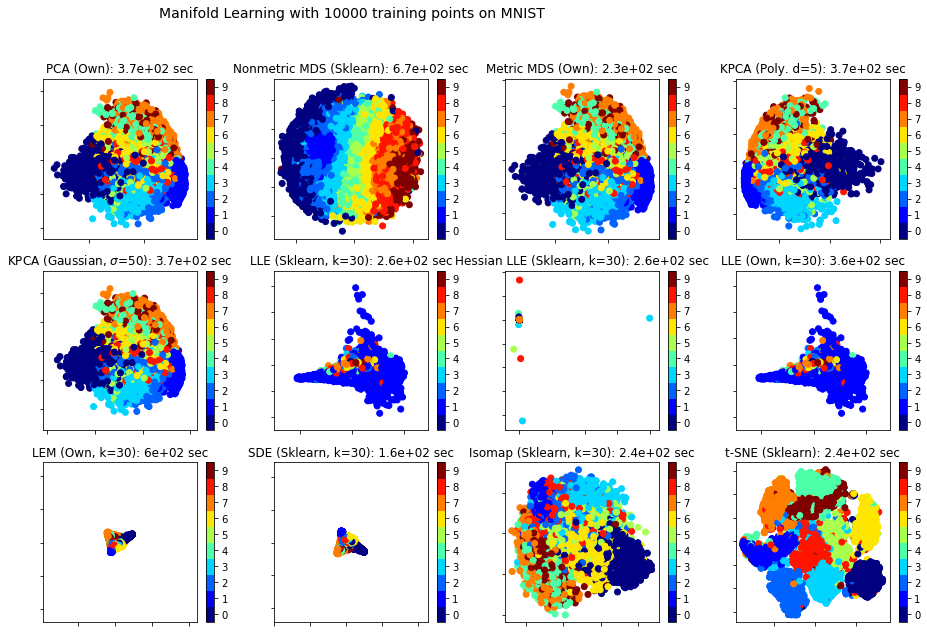


Testing...


In [ ]:
N_train, N_test = 10000, 10000
train_set = np.array(train[:N_train])
test_set = np.array(test[:N_test])
titles = ["Manifold Learning with %i training points on MNIST" % (N_train),
          "Manifold Learning with %i testing points on MNIST" % (N_test)]

params = {'kpca-poly': {'d': 5},
          'kpca-gaussian': {'sigma': 50},
          'LLE': {'k': 30},
          'LEM': {'k': 30, 'gamma': 50},
          'ISO': {'k': 30},
          'SDE': {'k': 30}
         }

comparison_class(train_set, test_set, 2, params, titles, True)

<a id='Classification task'></a>

## Classification

Now, we wish to train some basic classifiers (linear or nonlinear) on the MNIST data set combined with some NLDR techniques. To do so, we use the functions implemented in Sklearn to save computational resources (this is not an issue as we saw that our implementation is in line with that of Sklearn). Instead of applying costly cross-validations to optimize the different hyperparameters (for the NLDR algorithms and classifiers), we decide to only train the models on the 5000 first samples of the training set and use the 5000 first samples of the validation set to perform model selection. 

In [ ]:
def get_accuracy(X, y, model_nldr, model_clf, verbose=False, issklearn=False):
    """
    This function aims at: 
        - fitting and transforming the NLDR model `model_nldr` on the training data
        - transformating it on the validation data
        - fitting a classifier `model_clf` on the new training low-dimensional data
        - transforming it on the validation data
        - return the accuracy on train and validation set
    :param X: list of np.arrays (features), X[0]=train, X[1]=val, X[3]=test
    :param y: list of np.arrays (labels), y[0]=train, y[1]=val, y[3]=test
    :param model_nldr: class, model used for NonLinear Dimensionality Reduction
    :param model_clf: class, classifier to train on MNIST (10 labels)
    :param verbose: Bool, whether or not to plot the accuracies (classification) and silouhettes scores (clustering quality)
    :param issklearn: Bool, whether or not the model used comes from sklearn (syntax differences)
    :return: floats, train accuracy and validation accuracy
    
    NB: silouhette scores from Wikipedia (https://en.wikipedia.org/wiki/Silhouette_(clustering)):
            "The silhouette value is a measure of how similar an object is to its own
            cluster (cohesion) compared to other clusters (separation). The silhouette
            ranges from −1 to +1, where a high value indicates that the object is well
            matched to its own cluster and poorly matched to neighboring clusters."
            
    """
    
    t0 = time()
    verboseprint = print if verbose else lambda *a, **k: None
    X_train, X_val, X_test = X
    y_train, y_val, y_test = y
    # Fit and transform NLDR method
    if model_nldr is None:
        X_train_new = X_train
        X_val_new   = X_val
    else:
        if issklearn:
            data_train_new = np.array(model_nldr.fit_transform(X=X_train))
            data_val_new   = np.array(model_nldr.transform(X=X_val))
            X_train_new = data_train_new
            X_val_new   = data_val_new
        else:
            data_train_new = np.array(model_nldr.fit_transform(X=X_train, y=y_train))
            data_val_new   = np.array(model_nldr.transform(X=X_val, y=y_val))
            X_train_new = data_train_new[:, :-1]
            X_val_new   = data_val_new[:, :-1]
    # Print Silouhette scores
    verboseprint('Silouhette-score on train: %.2g' % silhouette_score(X=X_train_new, labels=y_train, metric='euclidean'))
    verboseprint('Silouhette-score on val: %.2g' % silhouette_score(X=X_val_new, labels=y_val, metric='euclidean'))
    # Fit and transform the classifier
    model_clf.fit(X_train_new, y_train)
    # Print accuracies
    train_acc = model_clf.score(X_train_new, y_train)
    val_acc = model_clf.score(X_val_new, y_val)
    verboseprint('Accuracy on train: %.2g' % train_acc)
    verboseprint('Accuracy on val: %.2g' % val_acc)
    t1 = time()
    verboseprint('Done in %.2g sec.' % (t1-t0))
    return train_acc, val_acc

def grid_search(X, y, models_clf, models_nldr, title, issklearn=False):
    """
    Perform model selection by comparing accuracies on the validation data (no cross-validation)
    :param X: list of np.arrays (features), X[0]=train, X[1]=val, X[3]=test
    :param y: list of np.arrays (labels), y[0]=train, y[1]=val, y[3]=test
    :param models_nldr: list of classes, models used for NonLinear Dimensionality Reduction
    :param models_clf: list of classes, classifiers to train on MNIST (10 labels)
    :param title: tuple, (name of NLDR algo, name of classifier). Example: ('KPCApoly', 'LDA')
    :param issklearn: Bool, whether or not the model used comes from sklearn (syntax differences)
    :return: best models for both NLDR and classification tasks
    """
    n1, n2 = len(models_clf), len(models_nldr)
    best_val_acc = 0
    T, V = np.zeros(1+n1*n2), np.zeros(1+n1*n2)
    models = [(None, models_clf[0])] + [(m_nldr, m_clf) for (m_nldr, m_clf) in product(models_nldr, models_clf)]
    for i, (m_nldr, m_clf) in enumerate(models):
        t0 = time()
        train_acc, val_acc = get_accuracy(X, y, m_nldr, m_clf, verbose=False, issklearn=issklearn)
        T[i], V[i] = train_acc, val_acc
        pickle.dump((T[1:].reshape((n1, n2)), V[1:].reshape((n1, n2))), open(os.path.join(path, 'Data/')+title[0]+'_'+title[1]+'.pk', 'wb'))
        t1 = time()
        # First, we test the classifier without NLDR technique
        if i==0:
            test_acc = m_clf.score(X[2], y[2])
            print('Model without NLDR done in %3.0f sec | Train_acc: %.5f | Val_acc: %.5f | Test_acc: %.5f' % (t1-t0, train_acc, val_acc, test_acc))
        else:  
            print('Model n°%3.0f done in %.5f sec | Train_acc: %.5f | Val_acc: %.5f' % (i+1, t1-t0, train_acc, val_acc))
        if (val_acc > best_val_acc) and (i > 0):
            best_model_nldr = m_nldr
            best_model_clf = m_clf
            best_val_acc = val_acc
            best_train_acc = train_acc
    if issklearn:
        best_model_clf.fit(best_model_nldr.fit_transform(X[0]), y[0])
        test_acc = best_model_clf.score(np.array(best_model_nldr.transform(X[2])), y[2])
    else:
        best_model_clf.fit(best_model_nldr.fit_transform(X[0], y[0]), y[0])
        test_acc = best_model_clf.score(np.array(best_model_nldr.transform(X[2], y[2])), y[2])
    print('Best model: Train_acc: %.5f | Val_acc: %.5f | Test_acc: %.5f' % (best_train_acc, best_val_acc, test_acc))
    return best_model_nldr, best_model_clf

The models used are now the following:
- NLDR           : PCA, Kernel PCA (polynomial, Gaussian), LLE, LEM, Isomap
- Classification : Linear Discriminant Analysis, Quadratic Discriminant Analysis, KNN, SVM (Gaussian and polynomial kernel)

**The training set is composed of the 5000 first samples of `MNIST-train`, as the validation set for `MNIST-val`. The test set is the initial one (10000 samples)**.

In [ ]:
warnings.filterwarnings('ignore') # disable warnings
N_train, N_val, N_test = 5000, 5000, 10000
X = [np.array(train)[:N_train, :-1], np.array(val)[:N_val, :-1], np.array(test)[:N_test, :-1]]
y = [np.array(train)[:N_train, -1], np.array(val)[:N_val, -1], np.array(test)[:N_test, -1]]

**Some experiments do not have any callbacks. This does not mean that it has not been run. The truth is that we separately run the cells on our personal laptops and google collab. Then, merging the different notebooks on GitHub was a terrible mess. We finally decided to only merge 1 notebook which does not contain all the experiments. However, all the `pickle` files can be found in the folder `Data` on the master branch.**

<a id='Linear Discriminant Analysis'></a>

### Linear Discriminant Analysis

In [ ]:
models_nldr = [KernelPCA(n_components=p, kernel='rbf', gamma=s) for (p, s) in product([50, 100, 200, 300, 400, 500, 600, 700], [1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.5])]
models_clf = [LDA()]
grid_search(X, y, models_clf, models_nldr, title=['KPCAgaussian', 'LDA'], issklearn=True)

Model without NLDR done in   5 sec | Train_acc: 0.92120 | Val_acc: 0.83460 | Test_acc: 0.83970
Model n°  2 done in 23.00266 sec | Train_acc: 0.88080 | Val_acc: 0.85240
Model n°  3 done in 22.88198 sec | Train_acc: 0.88840 | Val_acc: 0.86300
Model n°  4 done in 19.83454 sec | Train_acc: 0.89860 | Val_acc: 0.87340
Model n°  5 done in 18.64970 sec | Train_acc: 0.87060 | Val_acc: 0.84860
Model n°  6 done in 18.93061 sec | Train_acc: 0.59380 | Val_acc: 0.52200
Model n°  7 done in 18.92541 sec | Train_acc: 0.17860 | Val_acc: 0.15860
Model n°  8 done in 19.00621 sec | Train_acc: 0.89340 | Val_acc: 0.86000
Model n°  9 done in 19.23345 sec | Train_acc: 0.91260 | Val_acc: 0.88500
Model n° 10 done in 19.48245 sec | Train_acc: 0.92360 | Val_acc: 0.90340
Model n° 11 done in 19.19558 sec | Train_acc: 0.91660 | Val_acc: 0.89740
Model n° 12 done in 18.94359 sec | Train_acc: 0.65840 | Val_acc: 0.56640
Model n° 13 done in 19.02519 sec | Train_acc: 0.19200 | Val_acc: 0.15940
Model n° 14 done in 19.96731 

(KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
      fit_inverse_transform=False, gamma=0.01, kernel='rbf',
      kernel_params=None, max_iter=None, n_components=600, n_jobs=None,
      random_state=None, remove_zero_eig=False, tol=0),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
               solver='svd', store_covariance=False, tol=0.0001))

In [ ]:
models_nldr = [KernelPCA(n_components=p, kernel='poly', degree=d) for (p, d) in product([50, 100, 200, 300, 400, 500, 600, 700], [1, 2, 3, 4, 5])]
models_clf = [LDA()]
grid_search(X, y, models_clf, models_nldr, title=['KPCApoly', 'LDA'], issklearn=True)

Model without NLDR done in   4 sec | Train_acc: 0.92120 | Val_acc: 0.83460 | Test_acc: 0.83970
Model n°  2 done in 18.89473 sec | Train_acc: 0.87800 | Val_acc: 0.85060
Model n°  3 done in 18.52218 sec | Train_acc: 0.87860 | Val_acc: 0.85080
Model n°  4 done in 19.78734 sec | Train_acc: 0.87720 | Val_acc: 0.85020
Model n°  5 done in 19.78420 sec | Train_acc: 0.87580 | Val_acc: 0.84820
Model n°  6 done in 19.93620 sec | Train_acc: 0.87440 | Val_acc: 0.84760
Model n°  7 done in 18.82034 sec | Train_acc: 0.89020 | Val_acc: 0.85820
Model n°  8 done in 19.21448 sec | Train_acc: 0.89120 | Val_acc: 0.85940
Model n°  9 done in 20.46864 sec | Train_acc: 0.89320 | Val_acc: 0.85820
Model n° 10 done in 20.57913 sec | Train_acc: 0.89480 | Val_acc: 0.85980
Model n° 11 done in 20.29788 sec | Train_acc: 0.89420 | Val_acc: 0.86520
Model n° 12 done in 19.49240 sec | Train_acc: 0.89740 | Val_acc: 0.84960
Model n° 13 done in 19.84247 sec | Train_acc: 0.89960 | Val_acc: 0.85380
Model n° 14 done in 21.63749 

(KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
      fit_inverse_transform=False, gamma=None, kernel='poly',
      kernel_params=None, max_iter=None, n_components=700, n_jobs=None,
      random_state=None, remove_zero_eig=False, tol=0),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
               solver='svd', store_covariance=False, tol=0.0001))

In [ ]:
models_nldr = [manifold.LocallyLinearEmbedding(n_components=p, n_neighbors=k) for (p, k) in product([50, 100, 200, 300, 400, 500, 600, 700], [5, 10, 20, 30, 40, 50])]
grid_search(X, y, models_clf, models_nldr, title=['LLE', 'LDA'], issklearn=True)

Model without NLDR done in   5 sec | Train_acc: 0.92120 | Val_acc: 0.83460 | Test_acc: 0.83970
Model n°  2 done in 82.29748 sec | Train_acc: 0.91220 | Val_acc: 0.90240
Model n°  3 done in 81.54628 sec | Train_acc: 0.91480 | Val_acc: 0.90520
Model n°  4 done in 86.17289 sec | Train_acc: 0.88800 | Val_acc: 0.87380
Model n°  5 done in 89.07655 sec | Train_acc: 0.87140 | Val_acc: 0.87060
Model n°  6 done in 92.04404 sec | Train_acc: 0.86500 | Val_acc: 0.85600
Model n°  7 done in 95.19022 sec | Train_acc: 0.84580 | Val_acc: 0.84240
Model n°  8 done in 80.00919 sec | Train_acc: 0.92840 | Val_acc: 0.91340
Model n°  9 done in 81.73056 sec | Train_acc: 0.93160 | Val_acc: 0.92340
Model n° 10 done in 84.82970 sec | Train_acc: 0.92760 | Val_acc: 0.91740
Model n° 11 done in 88.02203 sec | Train_acc: 0.92240 | Val_acc: 0.90960
Model n° 12 done in 91.75915 sec | Train_acc: 0.91500 | Val_acc: 0.90140
Model n° 13 done in 96.35609 sec | Train_acc: 0.90900 | Val_acc: 0.89080
Model n° 14 done in 80.45017 

(LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
             method='standard', modified_tol=1e-12, n_components=700,
             n_jobs=None, n_neighbors=50, neighbors_algorithm='auto',
             random_state=None, reg=0.001, tol=1e-06),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
               solver='svd', store_covariance=False, tol=0.0001))

In [ ]:
models_nldr = [LEM(p=p, k=k, reg=1e-3, gamma=t) for (p, k, t) in product([50, 100, 200, 300, 400, 500, 600, 700], [5, 10, 20, 30, 40, 50], [5, 20, 50])]
grid_search(X, y, models_clf, models_nldr, title=['LEM', 'LDA'], issklearn=False)

Model without NLDR done in   4 sec | Train_acc: 0.92120 | Val_acc: 0.83460 | Test_acc: 0.83970
Model n°  2 done in 108.86625 sec | Train_acc: 0.92580 | Val_acc: 0.90800
Model n°  3 done in 107.79131 sec | Train_acc: 0.92580 | Val_acc: 0.91160
Model n°  4 done in 107.65121 sec | Train_acc: 0.92600 | Val_acc: 0.91260
Model n°  5 done in 109.35465 sec | Train_acc: 0.92400 | Val_acc: 0.91260
Model n°  6 done in 109.83479 sec | Train_acc: 0.92380 | Val_acc: 0.91360
Model n°  7 done in 109.09071 sec | Train_acc: 0.92340 | Val_acc: 0.91360
Model n°  8 done in 113.30679 sec | Train_acc: 0.92380 | Val_acc: 0.91180
Model n°  9 done in 112.69005 sec | Train_acc: 0.92460 | Val_acc: 0.91640
Model n° 10 done in 112.69450 sec | Train_acc: 0.92540 | Val_acc: 0.91640
Model n° 11 done in 117.01601 sec | Train_acc: 0.91800 | Val_acc: 0.90880
Model n° 12 done in 117.92257 sec | Train_acc: 0.92100 | Val_acc: 0.90900
Model n° 13 done in 117.58550 sec | Train_acc: 0.92040 | Val_acc: 0.90860
Model n° 14 done 

(<__main__.LEM at 0x1a2ef8c5c0>,
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
               solver='svd', store_covariance=False, tol=0.0001))

In [ ]:
models_nldr = [manifold.Isomap(n_components=p, n_neighbors=k) for (p, k) in product([50, 100, 200, 300, 400, 500, 600, 700], [5, 10, 20, 30, 40, 50])]
grid_search(X, y, models_clf, models_nldr, title=['ISO', 'LDA'], issklearn=True)

Model without NLDR done in   4 sec | Train_acc: 0.92120 | Val_acc: 0.83460 | Test_acc: 0.83970
Model n°  2 done in 89.72881 sec | Train_acc: 0.91540 | Val_acc: 0.89400
Model n°  3 done in 92.81831 sec | Train_acc: 0.91640 | Val_acc: 0.89220
Model n°  4 done in 97.50601 sec | Train_acc: 0.90620 | Val_acc: 0.87980
Model n°  5 done in 102.54516 sec | Train_acc: 0.90460 | Val_acc: 0.87600
Model n°  6 done in 107.70213 sec | Train_acc: 0.90300 | Val_acc: 0.86500
Model n°  7 done in 112.45790 sec | Train_acc: 0.90180 | Val_acc: 0.86340
Model n°  8 done in 90.83871 sec | Train_acc: 0.92280 | Val_acc: 0.90140
Model n°  9 done in 94.33813 sec | Train_acc: 0.92820 | Val_acc: 0.89800
Model n° 10 done in 99.67963 sec | Train_acc: 0.91680 | Val_acc: 0.88980
Model n° 11 done in 106.28893 sec | Train_acc: 0.92180 | Val_acc: 0.88560
Model n° 12 done in 116.86371 sec | Train_acc: 0.92000 | Val_acc: 0.87860
Model n° 13 done in 122.42489 sec | Train_acc: 0.91960 | Val_acc: 0.87860
Model n° 14 done in 91.

(Isomap(eigen_solver='auto', max_iter=None, n_components=500, n_jobs=None,
     n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
               solver='svd', store_covariance=False, tol=0.0001))

<a id='Quadratic Discriminant Analysis'></a>

### Quadratic Discriminant Analysis

In [ ]:
models_nldr = [KernelPCA(n_components=p, kernel='poly', degree=d) for (p, d) in product([50, 100, 200, 300, 400, 500, 600, 700], [1, 2, 3, 4, 5])]
models_clf = [QDA()]
grid_search(X, y, models_clf, models_nldr, title=['KPCApoly', 'QDA'], issklearn=True)

Model without NLDR done in   7 sec | Train_acc: 0.99460 | Val_acc: 0.60160 | Test_acc: 0.59040
Model n°  2 done in 18.61191 sec | Train_acc: 0.97860 | Val_acc: 0.95160
Model n°  3 done in 18.30551 sec | Train_acc: 0.97800 | Val_acc: 0.95180
Model n°  4 done in 20.78080 sec | Train_acc: 0.97740 | Val_acc: 0.95120
Model n°  5 done in 19.91637 sec | Train_acc: 0.97700 | Val_acc: 0.95020
Model n°  6 done in 20.00758 sec | Train_acc: 0.97700 | Val_acc: 0.94980
Model n°  7 done in 18.78470 sec | Train_acc: 0.98800 | Val_acc: 0.94060
Model n°  8 done in 18.54047 sec | Train_acc: 0.98820 | Val_acc: 0.94040
Model n°  9 done in 20.29201 sec | Train_acc: 0.98820 | Val_acc: 0.94020
Model n° 10 done in 20.27944 sec | Train_acc: 0.98860 | Val_acc: 0.94100
Model n° 11 done in 20.20594 sec | Train_acc: 0.98800 | Val_acc: 0.94080
Model n° 12 done in 19.56435 sec | Train_acc: 0.99880 | Val_acc: 0.90840
Model n° 13 done in 19.81278 sec | Train_acc: 0.99900 | Val_acc: 0.91060
Model n° 14 done in 21.19657 

(KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=2, eigen_solver='auto',
      fit_inverse_transform=False, gamma=None, kernel='poly',
      kernel_params=None, max_iter=None, n_components=50, n_jobs=None,
      random_state=None, remove_zero_eig=False, tol=0),
 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                store_covariance=False, store_covariances=None, tol=0.0001))

In [ ]:
models_nldr = [KernelPCA(n_components=p, kernel='rbf', gamma=s) for (p, s) in product([50, 100, 200, 300, 400, 500, 600, 700], [1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.5])]
grid_search(X, y, models_clf, models_nldr, title=['KPCAgaussian', 'QDA'], issklearn=True)

Model without NLDR done in   7 sec | Train_acc: 0.99460 | Val_acc: 0.60160 | Test_acc: 0.59040
Model n°  2 done in 18.74564 sec | Train_acc: 0.97880 | Val_acc: 0.95160
Model n°  3 done in 18.46610 sec | Train_acc: 0.97900 | Val_acc: 0.95240
Model n°  4 done in 18.57829 sec | Train_acc: 0.97980 | Val_acc: 0.95140
Model n°  5 done in 18.63015 sec | Train_acc: 0.93080 | Val_acc: 0.88320
Model n°  6 done in 19.00755 sec | Train_acc: 0.70740 | Val_acc: 0.62040
Model n°  7 done in 18.68359 sec | Train_acc: 0.34080 | Val_acc: 0.10680
Model n°  8 done in 18.96257 sec | Train_acc: 0.98800 | Val_acc: 0.94060
Model n°  9 done in 18.94195 sec | Train_acc: 0.99040 | Val_acc: 0.94780
Model n° 10 done in 19.00647 sec | Train_acc: 0.99200 | Val_acc: 0.95220
Model n° 11 done in 19.16393 sec | Train_acc: 0.97140 | Val_acc: 0.90880
Model n° 12 done in 19.00266 sec | Train_acc: 0.84280 | Val_acc: 0.72540
Model n° 13 done in 19.08657 sec | Train_acc: 0.44520 | Val_acc: 0.10680
Model n° 14 done in 20.33620 

(KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
      fit_inverse_transform=False, gamma=0.005, kernel='rbf',
      kernel_params=None, max_iter=None, n_components=50, n_jobs=None,
      random_state=None, remove_zero_eig=False, tol=0),
 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                store_covariance=False, store_covariances=None, tol=0.0001))

In [ ]:
models_nldr = [manifold.LocallyLinearEmbedding(n_components=p, n_neighbors=k) for (p, k) in product([50, 100, 200, 300, 400, 500, 600, 700], [5, 10, 20, 30, 40, 50])]
models_clf = [QDA()]
grid_search(X, y, models_clf, models_nldr, title=['LLE', 'QDA'], issklearn=True)

Model without NLDR done in   6 sec | Train_acc: 0.99500 | Val_acc: 0.59340 | Test_acc: 0.58700
Model n°  2 done in 98.97179 sec | Train_acc: 0.95320 | Val_acc: 0.90620
Model n°  3 done in 95.62800 sec | Train_acc: 0.94880 | Val_acc: 0.89880


In [ ]:
models_nldr = [LEM(p=p, k=k, reg=1e-3, gamma=t) for (p, k, t) in product([50, 100, 200, 300, 400, 500, 600, 700], [5, 10, 20, 30, 40, 50], [5, 20, 50])]
grid_search(X, y, models_clf, models_nldr, title=['LEM', 'QDA'], issklearn=False)

In [ ]:
models_nldr = [manifold.Isomap(n_components=p, n_neighbors=k) for (p, k) in product([50, 100, 200, 300, 400, 500, 600, 700], [5, 10, 20, 30, 40, 50])]
grid_search(X, y, models_clf, models_nldr, title=['ISO', 'QDA'], issklearn=True)

<a id='K-Nearest-Neighbors'></a>

### K-Nearest-Neighbors

In [ ]:
models_nldr = [KernelPCA(n_components=p, kernel='poly', degree=d) for (p, d) in product([10, 20, 50, 70, 100, 200], [1, 2, 3, 4, 5])]
models_clf = [KNN(n_neighbors=k) for k in [5, 10, 20, 30, 40]]
grid_search(X, y, models_clf, models_nldr, title=['KPCApoly', 'KNN'], issklearn=True)

Model without NLDR done in  78 sec | Train_acc: 0.96080 | Val_acc: 0.92780 | Test_acc: 0.93250
Model n°  2 done in 17.80554 sec | Train_acc: 0.93440 | Val_acc: 0.88160
Model n°  3 done in 17.29314 sec | Train_acc: 0.92600 | Val_acc: 0.88240
Model n°  4 done in 18.41021 sec | Train_acc: 0.91100 | Val_acc: 0.87220
Model n°  5 done in 17.93650 sec | Train_acc: 0.90320 | Val_acc: 0.86840
Model n°  6 done in 17.57993 sec | Train_acc: 0.89680 | Val_acc: 0.86400
Model n°  7 done in 17.34150 sec | Train_acc: 0.93420 | Val_acc: 0.88160
Model n°  8 done in 17.46373 sec | Train_acc: 0.92560 | Val_acc: 0.88240
Model n°  9 done in 18.44517 sec | Train_acc: 0.91020 | Val_acc: 0.87080
Model n° 10 done in 17.46744 sec | Train_acc: 0.90180 | Val_acc: 0.86620
Model n° 11 done in 17.61584 sec | Train_acc: 0.89480 | Val_acc: 0.86320
Model n° 12 done in 20.28698 sec | Train_acc: 0.93300 | Val_acc: 0.88080
Model n° 13 done in 21.82733 sec | Train_acc: 0.92320 | Val_acc: 0.88200
Model n° 14 done in 20.46822 

(KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=1, eigen_solver='auto',
      fit_inverse_transform=False, gamma=None, kernel='poly',
      kernel_params=None, max_iter=None, n_components=70, n_jobs=None,
      random_state=None, remove_zero_eig=False, tol=0),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
            weights='uniform'))

In [ ]:
models_nldr = [KernelPCA(n_components=p, kernel='rbf', gamma=s) for (p, s) in product([10, 20, 50, 70, 100, 200], [1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.5])]
grid_search(X, y, models_clf, models_nldr, title=['KPCAgaussian', 'KNN'], issklearn=True)

Model without NLDR done in  78 sec | Train_acc: 0.96080 | Val_acc: 0.92780 | Test_acc: 0.93250
Model n°  2 done in 19.05847 sec | Train_acc: 0.93520 | Val_acc: 0.88320
Model n°  3 done in 18.26654 sec | Train_acc: 0.92520 | Val_acc: 0.88160
Model n°  4 done in 18.74861 sec | Train_acc: 0.91060 | Val_acc: 0.87320
Model n°  5 done in 19.62506 sec | Train_acc: 0.90260 | Val_acc: 0.86900
Model n°  6 done in 19.51785 sec | Train_acc: 0.89740 | Val_acc: 0.86280
Model n°  7 done in 18.13732 sec | Train_acc: 0.93340 | Val_acc: 0.88420
Model n°  8 done in 18.29076 sec | Train_acc: 0.92320 | Val_acc: 0.88240
Model n°  9 done in 18.32777 sec | Train_acc: 0.90720 | Val_acc: 0.87900
Model n° 10 done in 19.54562 sec | Train_acc: 0.89920 | Val_acc: 0.86880
Model n° 11 done in 18.75420 sec | Train_acc: 0.89200 | Val_acc: 0.86440
Model n° 12 done in 18.11696 sec | Train_acc: 0.93260 | Val_acc: 0.88180
Model n° 13 done in 18.10719 sec | Train_acc: 0.91940 | Val_acc: 0.88480
Model n° 14 done in 18.27550 

(KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
      fit_inverse_transform=False, gamma=0.01, kernel='rbf',
      kernel_params=None, max_iter=None, n_components=100, n_jobs=None,
      random_state=None, remove_zero_eig=False, tol=0),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
            weights='uniform'))

In [ ]:
models_nldr = [manifold.LocallyLinearEmbedding(n_components=p, n_neighbors=k) for (p, k) in product([50, 100, 500, 600, 700], [10, 20, 30])]
models_clf = [KNN(n_neighbors=k) for k in [5, 10, 30]]
grid_search(X, y, models_clf, models_nldr, title=['LLE', 'KNN'], issklearn=True)

Model without NLDR done in  74 sec | Train_acc: 0.96080 | Val_acc: 0.92780 | Test_acc: 0.93250
Model n°  2 done in 98.68647 sec | Train_acc: 0.95600 | Val_acc: 0.92980
Model n°  3 done in 99.43868 sec | Train_acc: 0.94760 | Val_acc: 0.92720
Model n°  4 done in 100.80803 sec | Train_acc: 0.93580 | Val_acc: 0.92500
Model n°  5 done in 101.98049 sec | Train_acc: 0.94880 | Val_acc: 0.90620
Model n°  6 done in 103.00249 sec | Train_acc: 0.93560 | Val_acc: 0.90900
Model n°  7 done in 103.14999 sec | Train_acc: 0.92020 | Val_acc: 0.89980
Model n°  8 done in 107.16186 sec | Train_acc: 0.94180 | Val_acc: 0.89540
Model n°  9 done in 108.67069 sec | Train_acc: 0.92780 | Val_acc: 0.89040
Model n° 10 done in 107.97767 sec | Train_acc: 0.89940 | Val_acc: 0.87100
Model n° 11 done in 102.92312 sec | Train_acc: 0.95720 | Val_acc: 0.92040
Model n° 12 done in 103.32455 sec | Train_acc: 0.95180 | Val_acc: 0.92640
Model n° 13 done in 105.04588 sec | Train_acc: 0.93900 | Val_acc: 0.92020
Model n° 14 done in

(LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
             method='standard', modified_tol=1e-12, n_components=50,
             n_jobs=None, n_neighbors=10, neighbors_algorithm='auto',
             random_state=None, reg=0.001, tol=1e-06),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
            weights='uniform'))

In [ ]:
models_nldr = [LEM(p=p, k=k, reg=1e-3, gamma=t) for (p, k, t) in product([50, 100, 500, 600, 700], [10, 20, 30, 40], [5, 20, 50])]
models_clf = [KNN(n_neighbors=15)]
grid_search(X, y, models_clf, models_nldr, title=['LEM', 'KNN'], issklearn=False)

Model without NLDR done in  76 sec | Train_acc: 0.93640 | Val_acc: 0.91240 | Test_acc: 0.91940
Model n°  2 done in 142.37644 sec | Train_acc: 0.94200 | Val_acc: 0.92720
Model n°  3 done in 141.87304 sec | Train_acc: 0.94380 | Val_acc: 0.92900
Model n°  4 done in 142.82774 sec | Train_acc: 0.94360 | Val_acc: 0.92860
Model n°  5 done in 144.43655 sec | Train_acc: 0.94620 | Val_acc: 0.93280
Model n°  6 done in 148.18505 sec | Train_acc: 0.94940 | Val_acc: 0.92980
Model n°  7 done in 149.19709 sec | Train_acc: 0.94880 | Val_acc: 0.92940
Model n°  8 done in 159.28029 sec | Train_acc: 0.94120 | Val_acc: 0.92580
Model n°  9 done in 159.55946 sec | Train_acc: 0.94660 | Val_acc: 0.92900
Model n° 10 done in 162.40770 sec | Train_acc: 0.94800 | Val_acc: 0.92840
Model n° 11 done in 164.50888 sec | Train_acc: 0.94120 | Val_acc: 0.92220
Model n° 12 done in 159.25470 sec | Train_acc: 0.94340 | Val_acc: 0.92360
Model n° 13 done in 160.16839 sec | Train_acc: 0.94380 | Val_acc: 0.92440
Model n° 14 done 

In [ ]:
models_nldr = [manifold.Isomap(n_components=p, n_neighbors=k) for (p, k) in product([50, 100, 200, 300, 400, 500, 600, 700], [5, 10, 20, 30, 40, 50])]
grid_search(X, y, models_clf, models_nldr, title=['ISO', 'KNN'], issklearn=True)

<a id='Linear SVM'></a>

### Linear SVM

In [ ]:
models_nldr = [KernelPCA(n_components=p, kernel='poly', degree=d) for (p, d) in product([50, 100, 200, 300, 400, 500, 600, 700], [1, 2, 3, 4, 5])]
models_clf = [LinearSVC(C=c) for c in [1, 5, 10, 20]]
grid_search(X, y, models_clf, models_nldr, title=['KPCApoly', 'LinSVM'], issklearn=True)

Model without NLDR done in   7 sec | Train_acc: 0.99320 | Val_acc: 0.86720 | Test_acc: 0.86880
Model n°  2 done in 17.23339 sec | Train_acc: 0.89160 | Val_acc: 0.86800
Model n°  3 done in 17.32853 sec | Train_acc: 0.90820 | Val_acc: 0.88020
Model n°  4 done in 18.54569 sec | Train_acc: 0.91140 | Val_acc: 0.88040
Model n°  5 done in 18.61655 sec | Train_acc: 0.91180 | Val_acc: 0.88140
Model n°  6 done in 18.76598 sec | Train_acc: 0.90260 | Val_acc: 0.87640
Model n°  7 done in 17.34454 sec | Train_acc: 0.91220 | Val_acc: 0.88140
Model n°  8 done in 17.59653 sec | Train_acc: 0.91260 | Val_acc: 0.88280
Model n°  9 done in 18.24125 sec | Train_acc: 0.91320 | Val_acc: 0.88240
Model n° 10 done in 21.00178 sec | Train_acc: 0.90540 | Val_acc: 0.88020
Model n° 11 done in 20.43048 sec | Train_acc: 0.91320 | Val_acc: 0.88340
Model n° 12 done in 20.78695 sec | Train_acc: 0.91420 | Val_acc: 0.88320
Model n° 13 done in 21.52281 sec | Train_acc: 0.91500 | Val_acc: 0.88380
Model n° 14 done in 21.36122 

(KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=5, eigen_solver='auto',
      fit_inverse_transform=False, gamma=None, kernel='poly',
      kernel_params=None, max_iter=None, n_components=700, n_jobs=None,
      random_state=None, remove_zero_eig=False, tol=0),
 LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0))

In [ ]:
models_nldr = [KernelPCA(n_components=p, kernel='rbf', gamma=s) for (p, s) in product([50, 100, 200, 300, 400, 500, 600, 700], [1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.5])]
grid_search(X, y, models_clf, models_nldr, title=['KPCAgaussian', 'LinSVM'], issklearn=True)

Model without NLDR done in   6 sec | Train_acc: 0.99320 | Val_acc: 0.86680 | Test_acc: 0.86930
Model n°  2 done in 18.18592 sec | Train_acc: 0.89980 | Val_acc: 0.87400
Model n°  3 done in 19.80247 sec | Train_acc: 0.90880 | Val_acc: 0.88060
Model n°  4 done in 18.72618 sec | Train_acc: 0.91320 | Val_acc: 0.88300
Model n°  5 done in 19.26759 sec | Train_acc: 0.91340 | Val_acc: 0.88340
Model n°  6 done in 18.12210 sec | Train_acc: 0.91120 | Val_acc: 0.88340
Model n°  7 done in 19.11544 sec | Train_acc: 0.91780 | Val_acc: 0.88860
Model n°  8 done in 19.29561 sec | Train_acc: 0.91860 | Val_acc: 0.88900
Model n°  9 done in 19.55812 sec | Train_acc: 0.91940 | Val_acc: 0.88980
Model n° 10 done in 18.10729 sec | Train_acc: 0.91880 | Val_acc: 0.89120
Model n° 11 done in 18.87349 sec | Train_acc: 0.92160 | Val_acc: 0.89520
Model n° 12 done in 19.56510 sec | Train_acc: 0.92200 | Val_acc: 0.89660
Model n° 13 done in 19.10979 sec | Train_acc: 0.92180 | Val_acc: 0.89660
Model n° 14 done in 18.14953 

(KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
      fit_inverse_transform=False, gamma=0.05, kernel='rbf',
      kernel_params=None, max_iter=None, n_components=700, n_jobs=None,
      random_state=None, remove_zero_eig=False, tol=0),
 LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0))

In [ ]:
models_nldr = [manifold.LocallyLinearEmbedding(n_components=p, n_neighbors=k) for (p, k) in product([50, 100, 200, 300, 400, 500, 600, 700], [5, 10, 20, 30, 40, 50])]
grid_search(X, y, models_clf, models_nldr, title=['LLE', 'LinSVM'], issklearn=True)

In [ ]:
models_nldr = [LEM(p=p, k=k, reg=1e-3, gamma=t) for (p, k, t) in product([50, 100, 200, 300, 400, 500, 600, 700], [5, 10, 20, 30, 40, 50], [5, 20, 50])]
grid_search(X, y, models_clf, models_nldr, title=['LEM', 'LinSVM'], issklearn=False)

In [ ]:
models_nldr = [manifold.Isomap(n_components=p, n_neighbors=k) for (p, k) in product([50, 100, 200, 300, 400, 500, 600, 700], [5, 10, 20, 30, 40, 50])]
grid_search(X, y, models_clf, models_nldr, title=['ISO', 'LinSVM'], issklearn=True)

<a id='SVM with Gaussian kernel'></a>

### SVM with Gaussian kernel

In [ ]:
models_nldr = [KernelPCA(n_components=p, kernel='poly', degree=d) for (p, d) in product([10, 20, 50, 75, 100], [1, 2, 3, 4, 5])]
models_clf = [SVC(C=c, kernel='rbf') for c in [10, 20, 50, 1e2]] # sensitive to sigma
grid_search(X, y, models_clf, models_nldr, title=['KPCApoly', 'GSVC'], issklearn=True) 

Model without NLDR done in  31 sec | Train_acc: 0.96720 | Val_acc: 0.92380 | Test_acc: 0.93050
Model n°  2 done in 18.64686 sec | Train_acc: 0.82000 | Val_acc: 0.80260
Model n°  3 done in 19.22354 sec | Train_acc: 0.82820 | Val_acc: 0.81420
Model n°  4 done in 18.52852 sec | Train_acc: 0.83780 | Val_acc: 0.81520
Model n°  5 done in 18.54240 sec | Train_acc: 0.84280 | Val_acc: 0.81660
Model n°  6 done in 18.37952 sec | Train_acc: 0.82940 | Val_acc: 0.81240
Model n°  7 done in 19.25096 sec | Train_acc: 0.83720 | Val_acc: 0.81640
Model n°  8 done in 18.91298 sec | Train_acc: 0.84560 | Val_acc: 0.81960
Model n°  9 done in 17.86492 sec | Train_acc: 0.85080 | Val_acc: 0.82300
Model n° 10 done in 21.22375 sec | Train_acc: 0.83440 | Val_acc: 0.81420
Model n° 11 done in 21.10040 sec | Train_acc: 0.84560 | Val_acc: 0.81800
Model n° 12 done in 21.87296 sec | Train_acc: 0.85180 | Val_acc: 0.82440
Model n° 13 done in 20.92981 sec | Train_acc: 0.86020 | Val_acc: 0.82800
Model n° 14 done in 21.20699 

(KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=5, eigen_solver='auto',
      fit_inverse_transform=False, gamma=None, kernel='poly',
      kernel_params=None, max_iter=None, n_components=100, n_jobs=None,
      random_state=None, remove_zero_eig=False, tol=0),
 SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False))

In [ ]:
models_nldr = [KernelPCA(n_components=p, kernel='rbf', gamma=s) for (p, s) in product([10, 20, 50, 75, 100], [1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.5])]
grid_search(X, y, models_clf, models_nldr, title=['KPCAgaussian', 'GSVC'], issklearn=True)

Model without NLDR done in  29 sec | Train_acc: 0.96720 | Val_acc: 0.92380 | Test_acc: 0.93050
Model n°  2 done in 23.26139 sec | Train_acc: 0.82300 | Val_acc: 0.80620
Model n°  3 done in 22.35204 sec | Train_acc: 0.83240 | Val_acc: 0.81360
Model n°  4 done in 22.09664 sec | Train_acc: 0.84100 | Val_acc: 0.81500
Model n°  5 done in 22.91885 sec | Train_acc: 0.84560 | Val_acc: 0.82040
Model n°  6 done in 22.18374 sec | Train_acc: 0.83780 | Val_acc: 0.81660
Model n°  7 done in 22.06960 sec | Train_acc: 0.84520 | Val_acc: 0.82180
Model n°  8 done in 22.30611 sec | Train_acc: 0.85400 | Val_acc: 0.83020
Model n°  9 done in 23.47579 sec | Train_acc: 0.86460 | Val_acc: 0.83720
Model n° 10 done in 22.04280 sec | Train_acc: 0.84100 | Val_acc: 0.82060
Model n° 11 done in 22.07005 sec | Train_acc: 0.84800 | Val_acc: 0.82600
Model n° 12 done in 23.17061 sec | Train_acc: 0.86140 | Val_acc: 0.83420
Model n° 13 done in 21.88686 sec | Train_acc: 0.86840 | Val_acc: 0.84100
Model n° 14 done in 22.87785 

(KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
      fit_inverse_transform=False, gamma=0.01, kernel='rbf',
      kernel_params=None, max_iter=None, n_components=100, n_jobs=None,
      random_state=None, remove_zero_eig=False, tol=0),
 SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False))

In [ ]:
models_nldr = [manifold.LocallyLinearEmbedding(n_components=p, n_neighbors=k) for (p, k) in product([50, 100, 300, 500, 700], [10, 20, 30, 40])]
models_clf = [SVC(C=100, kernel='rbf')]
grid_search(X, y, models_clf, models_nldr, title=['LLE', 'GSVC'], issklearn=True)

Model without NLDR done in  24 sec | Train_acc: 0.99820 | Val_acc: 0.92340 | Test_acc: 0.93100
Model n°  2 done in 99.10204 sec | Train_acc: 0.91540 | Val_acc: 0.90580
Model n°  3 done in 102.74998 sec | Train_acc: 0.88060 | Val_acc: 0.86300
Model n°  4 done in 104.14828 sec | Train_acc: 0.85300 | Val_acc: 0.84740
Model n°  5 done in 109.34391 sec | Train_acc: 0.85540 | Val_acc: 0.84280
Model n°  6 done in 105.92301 sec | Train_acc: 0.92100 | Val_acc: 0.91140
Model n°  7 done in 109.59633 sec | Train_acc: 0.90780 | Val_acc: 0.89440
Model n°  8 done in 109.71399 sec | Train_acc: 0.89540 | Val_acc: 0.88460
Model n°  9 done in 113.90118 sec | Train_acc: 0.89220 | Val_acc: 0.87280
Model n° 10 done in 133.94340 sec | Train_acc: 0.82980 | Val_acc: 0.76060
Model n° 11 done in 134.84514 sec | Train_acc: 0.79720 | Val_acc: 0.72100
Model n° 12 done in 138.52626 sec | Train_acc: 0.77280 | Val_acc: 0.70020
Model n° 13 done in 143.42434 sec | Train_acc: 0.75120 | Val_acc: 0.66840
Model n° 14 done i

(LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
             method='standard', modified_tol=1e-12, n_components=100,
             n_jobs=None, n_neighbors=10, neighbors_algorithm='auto',
             random_state=None, reg=0.001, tol=1e-06),
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False))

In [ ]:
models_nldr = [LEM(p=p, k=k, reg=1e-3, gamma=t) for (p, k, t) in product([50, 100, 300, 500, 700], [10, 20, 30, 40], [5, 20, 50])]
grid_search(X, y, models_clf, models_nldr, title=['LEM', 'GSVC'], issklearn=False)

In [ ]:
models_nldr = [manifold.Isomap(n_components=p, n_neighbors=k) for (p, k) in product([50, 100, 300, 500, 700], [10, 20, 30, 40])]
grid_search(X, y, models_clf, models_nldr, title=['ISO', 'GSVC'], issklearn=True)

<a id='SVM with polynomial kernel'></a>

<a id='Neural Network'></a>

### Neural Network

In this part, we wish to train from scratch a simple neural network without data augmentation/preprocessing and **without dimensionality reduction**.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

def main(epochs):
    # Training settings
    args = {'batch_size': 64,
           'test_batch_size': 1000,
           'epochs': epochs,
           'lr': 0.01,
           'momentum': 0.5, 
           'seed': 1,
           'log_interval': 10}

    use_cuda = 'cuda' if torch.cuda.is_available() else 'gpu'

    torch.manual_seed(args['seed'])

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args['batch_size'], shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args['test_batch_size'], shuffle=True, **kwargs)


    model = Net().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

    t0 = time()
    for epoch in range(1, args['epochs'] + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)
    print('Process finished in {:4.2f} seconds'.format(time()-t0))

In [ ]:
main(epochs=20)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300039
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.213459
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.170403
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.076579
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.867874
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.413523
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.000300
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.776155
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.459784
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.485992
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.438883
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.408428
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.460159
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.428866
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.398963
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.385041
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.298306
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.503218
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.523939
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.338331
Train Epoch: 1 [12800/60000 (

<a id='Appendix'></a>

# Appendix

This part is dedicated to plotting the 2D visual distribution of some digits after the use of some NLDR technique.

In [ ]:
def plot_components(number, proj, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

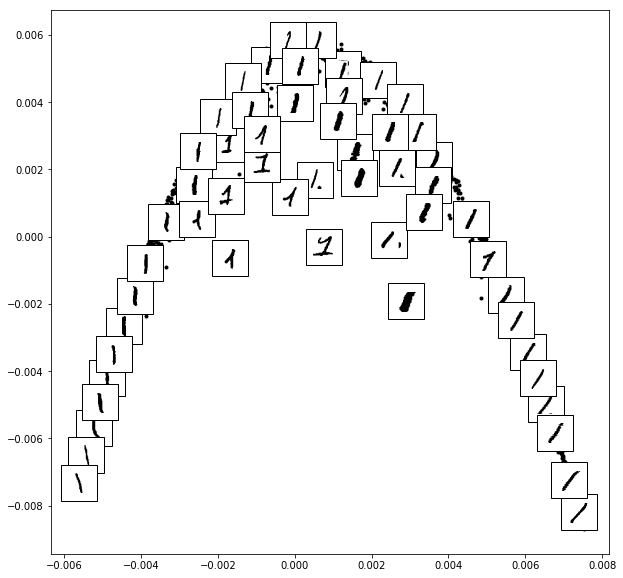

In [ ]:
# Choose 1/4 of the "1" digits to project with Laplacian EigenMaps
data = np.array(train[train.Y == 1][::4])
L = LEM(k=30, p=2, reg=1e-3, gamma=50)
train_new = L.fit_transform(X=data[:, :-1], y=data[:, -1])
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(data, np.array(train_new)[:, :-1], images=data[:, :-1].reshape((-1, 28, 28)), ax=ax, thumb_frac=0.05, cmap='gray_r')

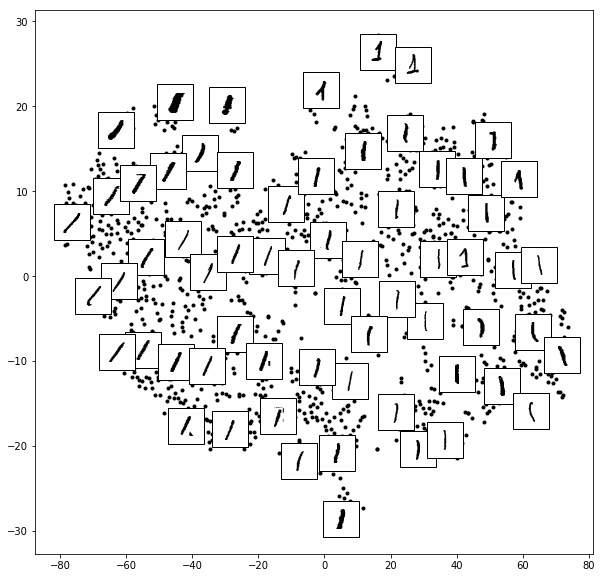

In [ ]:
# Choose 1/4 of the "1" digits to project with TSNE (Sklearn)
data = np.array(train[train.Y == 1][::4])
L = manifold.TSNE(n_components=2)
train_new = L.fit_transform(X=data[:, :-1])
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(data, train_new, images=data[:, :-1].reshape((-1, 28, 28)), ax=ax, thumb_frac=0.05, cmap='gray_r')